# Machine Learning Project : Tax Risk Identification
Gabriel SULTAN - Lalith Adithya CHANUMOLU - DIA 6

We'll be using the Tax Risk Identification Dataset available on Kaggle here : https://www.kaggle.com/datasets/ziya07/tax-risk-identification-dataset




dataset description : **to add** 
Project description : **to add**

# I/ Dataset loading and basic observations

In [1]:
import pandas as pd

df = pd.read_csv('data/tax_risk_dataset.csv')

df.head()


,Taxpayer_ID,Revenue,Expenses,Tax_Liability,Tax_Paid,Late_Filings,Compliance_Violations,Industry,Profit,Tax_Compliance_Ratio,Audit_Findings,Audit_to_Tax_Ratio,Risk_Label
0,1,1149014.25,979871.09,39872.33,28921.92,2,1,Finance,169143.16,0.73,0,0.0,High
1,2,958520.71,884926.74,47832.22,39396.15,1,1,Retail,73593.97,0.82,0,0.0,Medium
2,3,1194306.56,711926.07,38113.70,43863.94,4,0,Manufacturing,482380.49,1.15,3,0.0,High
3,4,1456908.96,570612.64,45380.58,66876.88,4,2,Finance,886296.32,1.47,1,0.0,High
4,5,929753.99,839644.66,21595.78,53565.53,0,0,Tech,90109.33,2.48,2,0.0,Low


In [2]:
df.describe(include='all')


,Taxpayer_ID,Revenue,Expenses,Tax_Liability,Tax_Paid,Late_Filings,Compliance_Violations,Industry,Profit,Tax_Compliance_Ratio,Audit_Findings,Audit_to_Tax_Ratio,Risk_Label
count,1000.000000,1.000000e+03,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000,1.000000e+03,1000.000000,1000.000000,1000.0,1000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Retail,NaN,NaN,NaN,NaN,High
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,233,NaN,NaN,NaN,NaN,736
mean,500.500000,1.005800e+06,7.141672e+05,50087.513200,47812.807910,2.029000,1.033000,NaN,2.916324e+05,1.077180,4.396000,0.0,NaN
std,288.819436,2.937648e+05,1.994909e+05,14751.814482,10271.325437,1.415685,0.812756,NaN,3.617036e+05,0.617086,2.927414,0.0,NaN
min,1.000000,2.761980e+04,1.119223e+05,4707.320000,18705.510000,0.000000,0.000000,NaN,-7.801314e+05,0.240000,0.000000,0.0,NaN
25%,250.750000,8.057229e+05,5.787517e+05,40280.002500,40625.797500,1.000000,0.000000,NaN,4.100442e+04,0.767500,2.000000,0.0,NaN
50%,500.500000,1.007590e+06,7.126154e+05,49996.240000,48001.845000,2.000000,1.000000,NaN,2.856810e+05,0.970000,4.000000,0.0,NaN
75%,750.250000,1.194383e+06,8.457764e+05,59913.732500,54669.455000,3.000000,2.000000,NaN,5.514364e+05,1.210000,7.000000,0.0,NaN


Distribution of target variable 'Risk_Label':
 Risk_Label
High      736
Low       152
Medium    112
Name: count, dtype: int64

Proportion of each class:
 Risk_Label
High      0.736
Low       0.152
Medium    0.112
Name: count, dtype: float64


<Axes: title={'center': 'Risk_Label Distribution'}, xlabel='Risk_Label'>

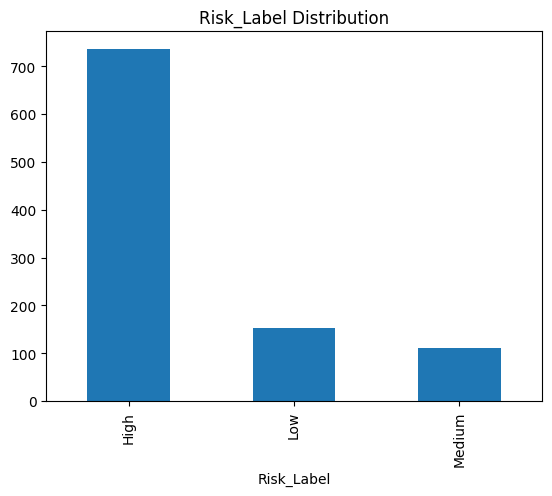

In [4]:
risk_label_counts = df['Risk_Label'].value_counts()
print("Distribution of target variable 'Risk_Label':\n", risk_label_counts)
print("\nProportion of each class:\n", risk_label_counts / len(df))
risk_label_counts.plot(kind='bar', title="Risk_Label Distribution")


One risk label is much more common, models may be biased and special sampling or weighting may be needed.


In [5]:
#dropping ID as it is not needed for later
df = df.drop('Taxpayer_ID', axis=1)
print(df.head())


      Revenue   Expenses  Tax_Liability  Tax_Paid  Late_Filings  \
0  1149014.25  979871.09       39872.33  28921.92             2   
1   958520.71  884926.74       47832.22  39396.15             1   
2  1194306.56  711926.07       38113.70  43863.94             4   
3  1456908.96  570612.64       45380.58  66876.88             4   
4   929753.99  839644.66       21595.78  53565.53             0   

   Compliance_Violations       Industry     Profit  Tax_Compliance_Ratio  \
0                      1        Finance  169143.16                  0.73   
1                      1         Retail   73593.97                  0.82   
2                      0  Manufacturing  482380.49                  1.15   
3                      2        Finance  886296.32                  1.47   
4                      0           Tech   90109.33                  2.48   

   Audit_Findings  Audit_to_Tax_Ratio Risk_Label  
0               0                 0.0       High  
1               0                 0.0 

# II / Analyse Détaillée des Données et Visualisations


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Configuration des graphiques
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

# Informations générales sur le dataset
print("=" * 60)
print("INFORMATIONS GÉNÉRALES SUR LE DATASET")
print("=" * 60)
print(f"Nombre total d'observations : {len(df)}")
print(f"Nombre de caractéristiques : {len(df.columns)}")
print(f"\nTypes de données :")
print(df.dtypes)
print(f"\nMémoire utilisée : {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")


INFORMATIONS GÉNÉRALES SUR LE DATASET
Nombre total d'observations : 1000
Nombre de caractéristiques : 12

Types de données :
Revenue                  float64
Expenses                 float64
Tax_Liability            float64
Tax_Paid                 float64
Late_Filings               int64
Compliance_Violations      int64
Industry                  object
Profit                   float64
Tax_Compliance_Ratio     float64
Audit_Findings             int64
Audit_to_Tax_Ratio       float64
Risk_Label                object
dtype: object

Mémoire utilisée : 0.18 MB


From here we know that some data encoding will be needed

## 1. Distribution de la Variable Cible (Risk_Label)


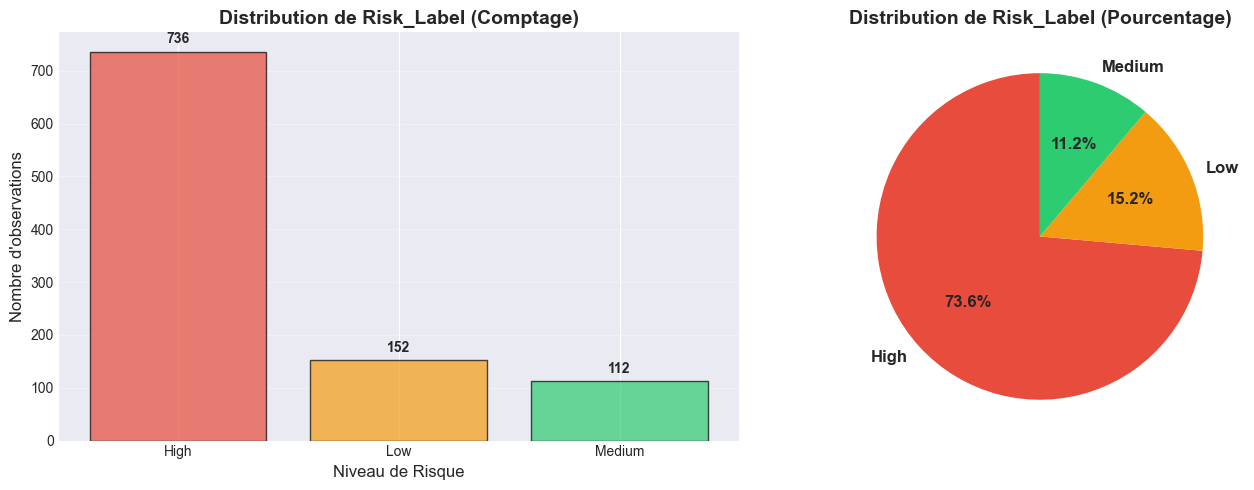


Distribution détaillée :
Risk_Label
High      736
Low       152
Medium    112
Name: count, dtype: int64

Pourcentages :
Risk_Label
High      73.6
Low       15.2
Medium    11.2
Name: proportion, dtype: float64


In [8]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Graphique en barres
risk_counts = df['Risk_Label'].value_counts()
colors = ['#e74c3c', '#f39c12', '#2ecc71']  # Rouge, Orange, Vert
axes[0].bar(risk_counts.index, risk_counts.values, color=colors, alpha=0.7, edgecolor='black')
axes[0].set_title('Distribution de Risk_Label (Comptage)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Niveau de Risque', fontsize=12)
axes[0].set_ylabel('Nombre d\'observations', fontsize=12)
axes[0].grid(axis='y', alpha=0.3)

# Ajouter les valeurs sur les barres
for i, v in enumerate(risk_counts.values):
    axes[0].text(i, v + 10, str(v), ha='center', va='bottom', fontweight='bold')

# Graphique en camembert
risk_proportions = df['Risk_Label'].value_counts(normalize=True) * 100
axes[1].pie(risk_proportions.values, labels=risk_proportions.index, autopct='%1.1f%%', 
            colors=colors, startangle=90, textprops={'fontsize': 12, 'fontweight': 'bold'})
axes[1].set_title('Distribution de Risk_Label (Pourcentage)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\nDistribution détaillée :")
print(df['Risk_Label'].value_counts())
print(f"\nPourcentages :")
print((df['Risk_Label'].value_counts(normalize=True) * 100).round(2))


## 2. Distribution des Variables Numériques


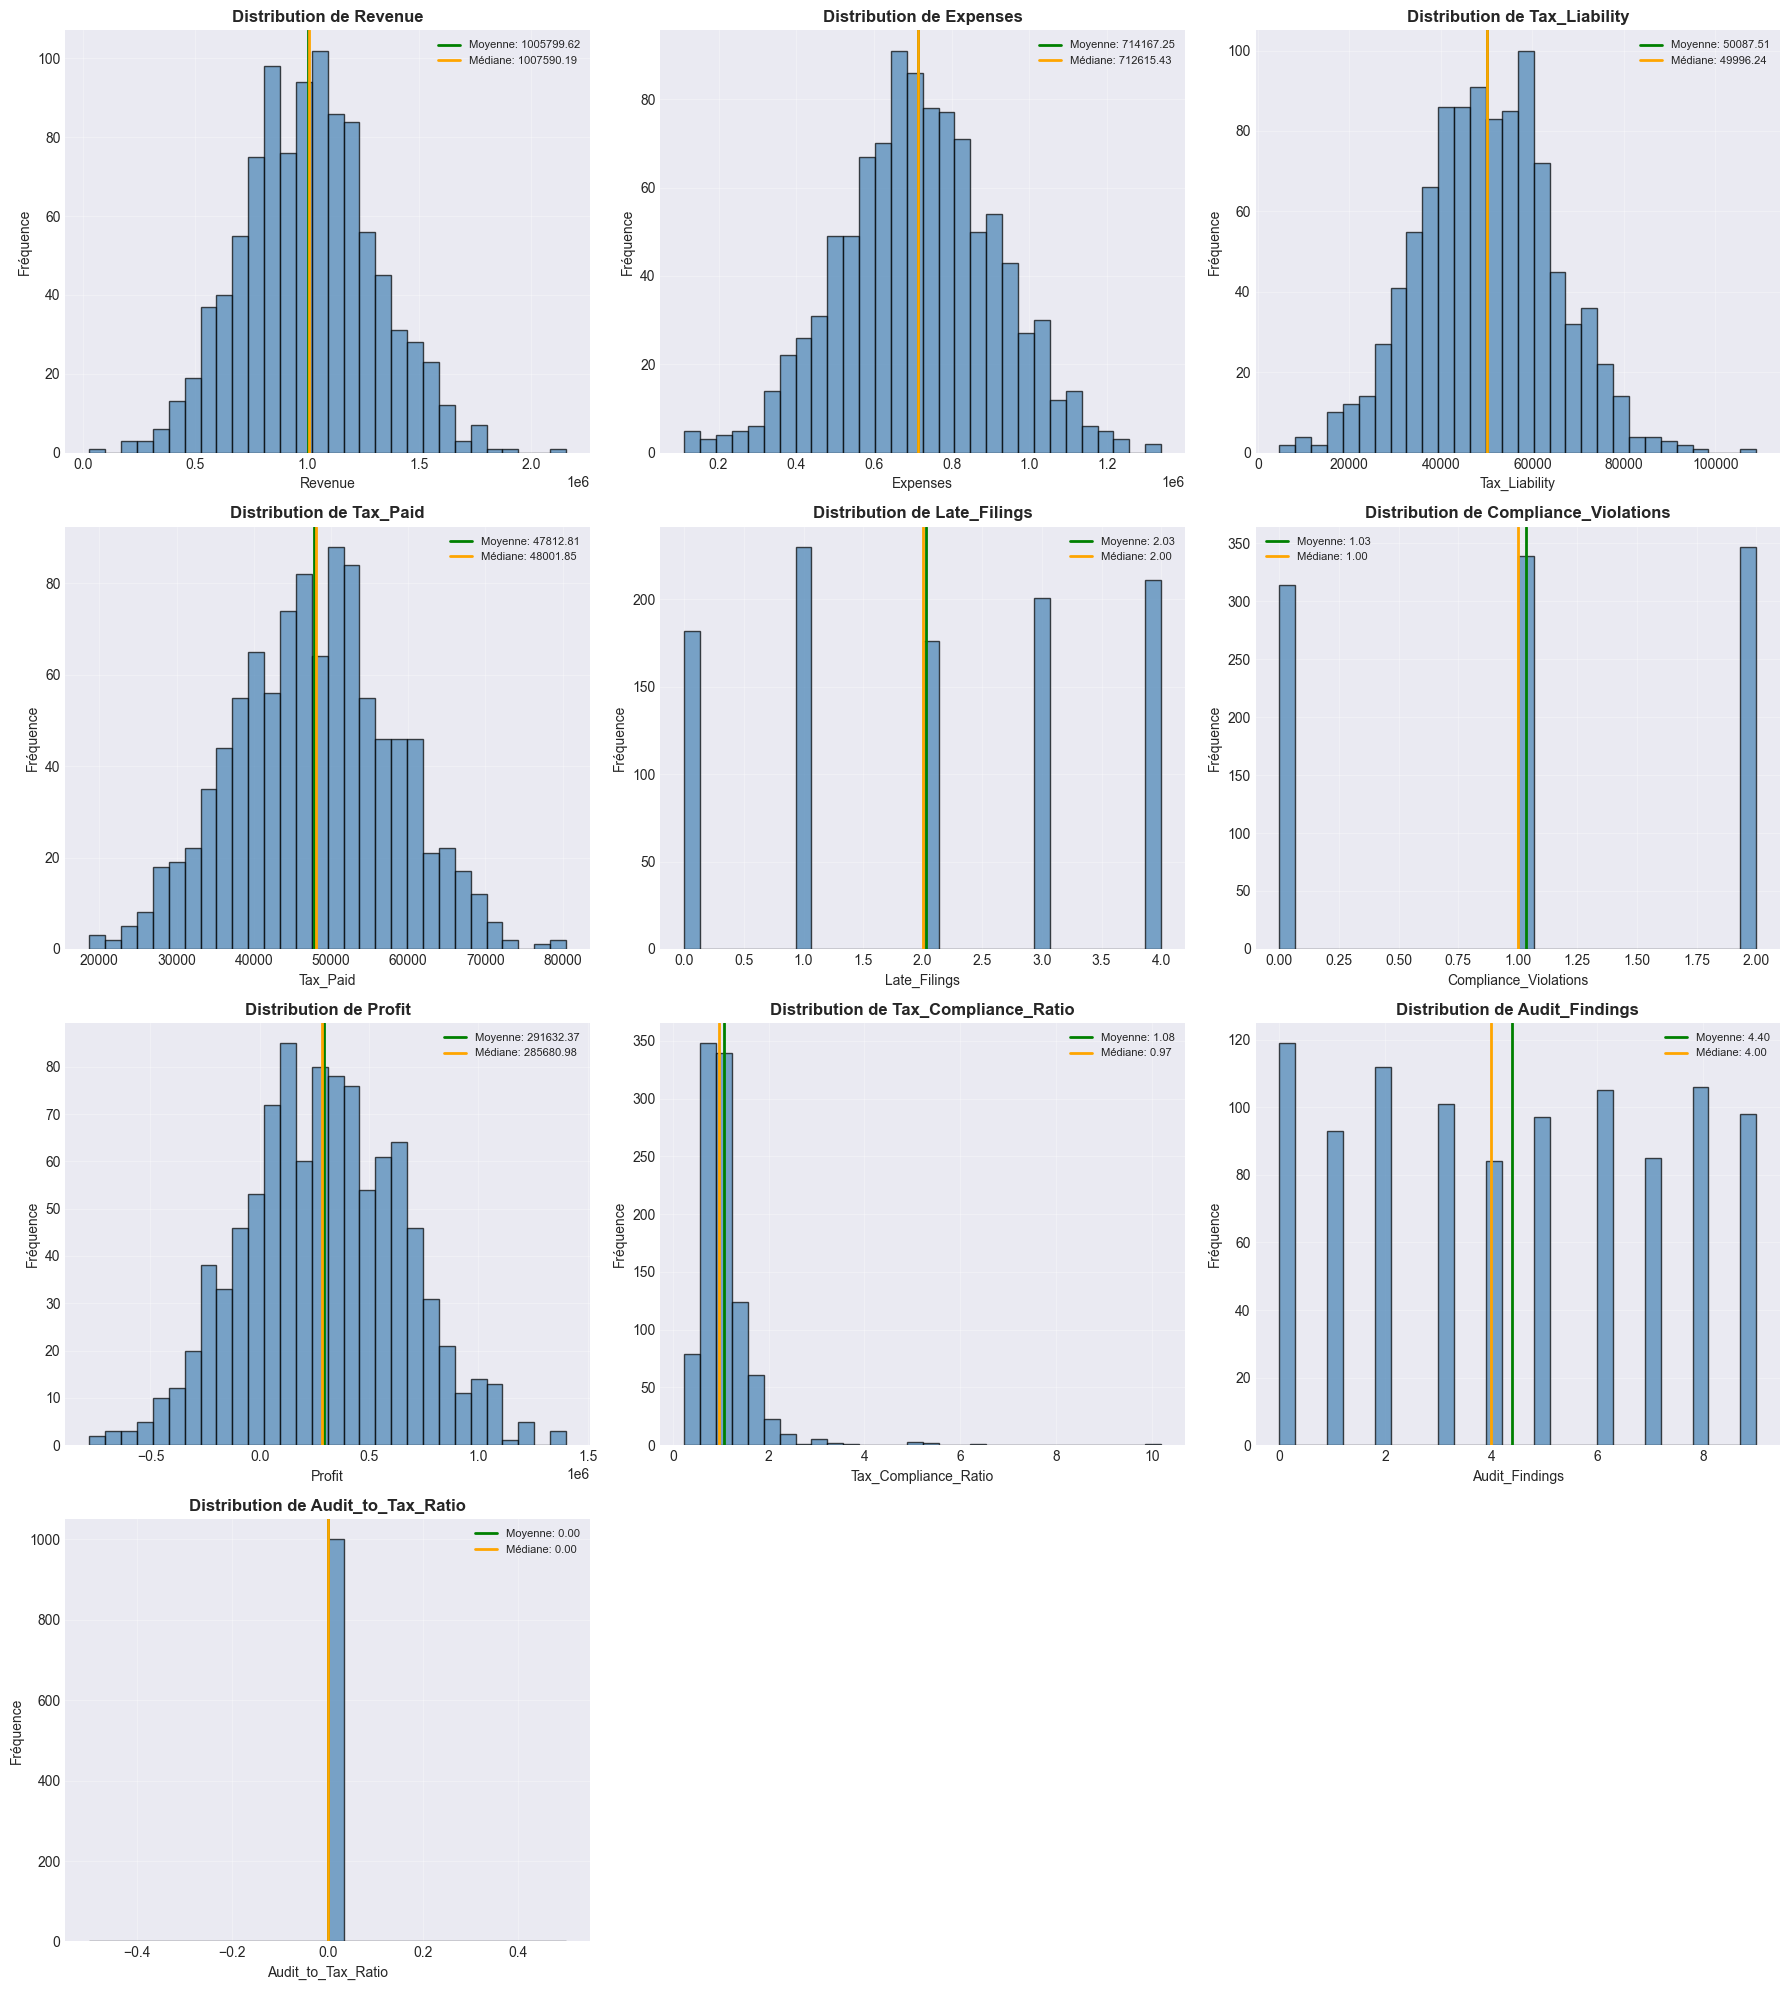

In [10]:
# Histogrammes seulement pour toutes les variables numériques (sans courbe de densité)
n_cols = 3
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    ax = axes[i]
    
    # Histogramme SANS courbe de densité (pour éviter LinAlgError de gaussian_kde)
    df[col].hist(bins=30, ax=ax, alpha=0.7, edgecolor='black', color='steelblue')
    
    ax.set_title(f'Distribution de {col}', fontsize=12, fontweight='bold')
    ax.set_xlabel(col, fontsize=10)
    ax.set_ylabel('Fréquence', fontsize=10)
    ax.grid(alpha=0.3)
    
    # Ajouter des statistiques
    mean_val = df[col].mean()
    median_val = df[col].median()
    ax.axvline(mean_val, color='green', linestyle='-', linewidth=2, label=f'Moyenne: {mean_val:.2f}')
    ax.axvline(median_val, color='orange', linestyle='-', linewidth=2, label=f'Médiane: {median_val:.2f}')
    ax.legend(fontsize=8)

# Masquer les axes inutilisés
for i in range(len(numeric_cols), len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()


## 3. Boxplots pour Détecter les Outliers


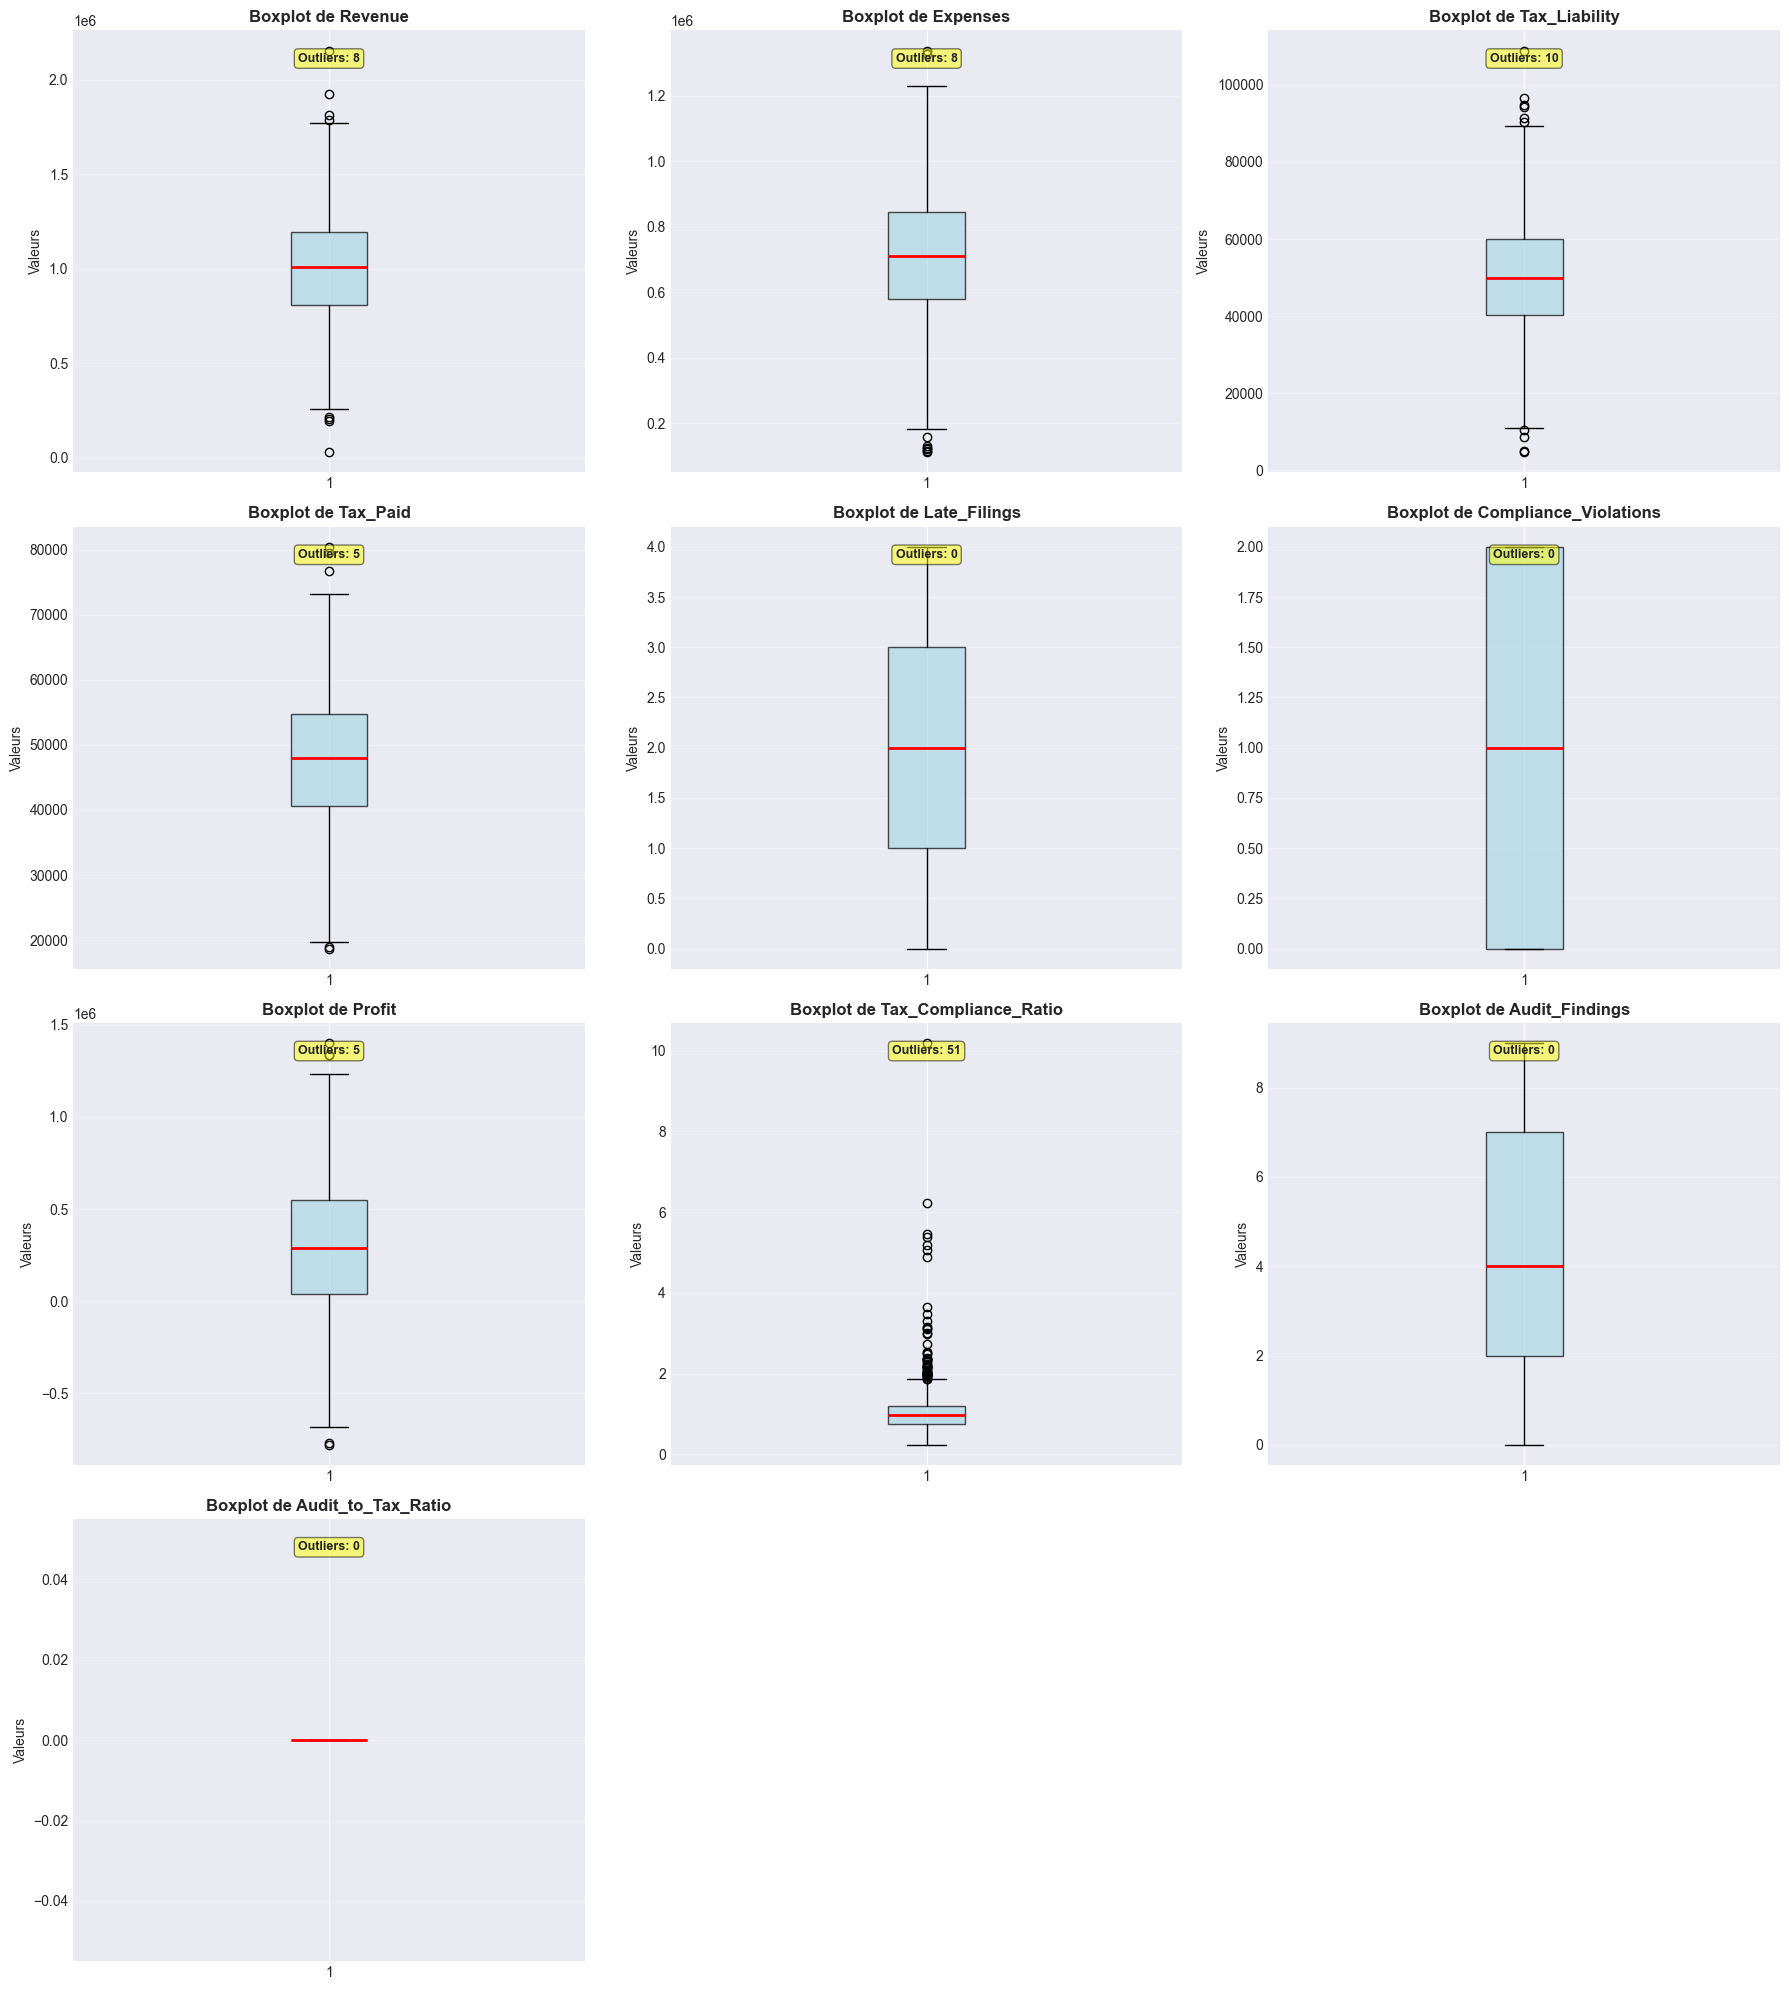

In [11]:
n_cols = 3
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    ax = axes[i]
    box_plot = ax.boxplot(df[col], vert=True, patch_artist=True, 
                          boxprops=dict(facecolor='lightblue', alpha=0.7),
                          medianprops=dict(color='red', linewidth=2))
    ax.set_title(f'Boxplot de {col}', fontsize=12, fontweight='bold')
    ax.set_ylabel('Valeurs', fontsize=10)
    ax.grid(axis='y', alpha=0.3)
    
    # Calculer et afficher les outliers
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    ax.text(0.5, 0.95, f'Outliers: {len(outliers)}', 
            transform=ax.transAxes, ha='center', va='top',
            bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.5),
            fontsize=9, fontweight='bold')

for i in range(len(numeric_cols), len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()


In [13]:
# Suppression des outliers pour chaque variable numérique (méthode IQR)
initial_len = len(df)
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
df.reset_index(drop=True, inplace=True)
num_deleted_outliers = initial_len - len(df)
print(f"Nombre d'outliers supprimés : {num_deleted_outliers}")


Nombre d'outliers supprimés : 12


## 4. Matrice de Corrélation


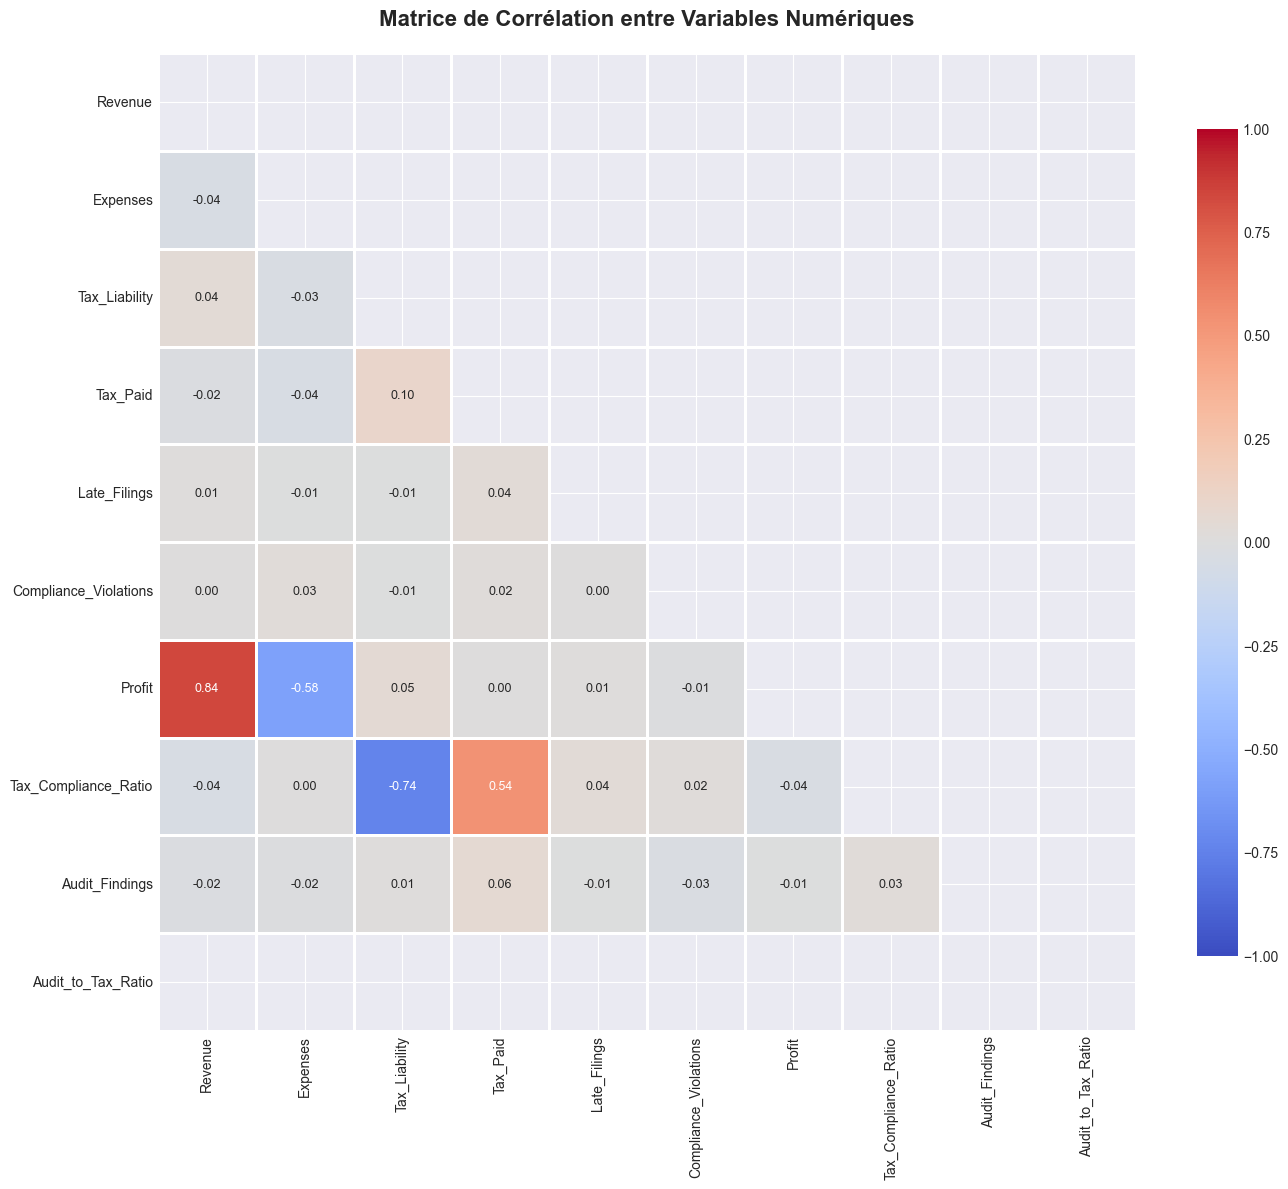


CORRÉLATIONS FORTES (|r| > 0.5)
Revenue <-> Profit: 0.839
Expenses <-> Profit: -0.578
Tax_Liability <-> Tax_Compliance_Ratio: -0.741
Tax_Paid <-> Tax_Compliance_Ratio: 0.536


In [14]:
# Calcul de la matrice de corrélation
correlation_matrix = df[numeric_cols].corr()

# Visualisation avec heatmap
plt.figure(figsize=(14, 12))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))  # Masquer la partie supérieure
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8},
            vmin=-1, vmax=1, annot_kws={'size': 9})
plt.title('Matrice de Corrélation entre Variables Numériques', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Identifier les corrélations fortes
print("\n" + "=" * 60)
print("CORRÉLATIONS FORTES (|r| > 0.5)")
print("=" * 60)
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_val = correlation_matrix.iloc[i, j]
        if abs(corr_val) > 0.5:
            print(f"{correlation_matrix.columns[i]} <-> {correlation_matrix.columns[j]}: {corr_val:.3f}")


## 5. Analyse par Industrie


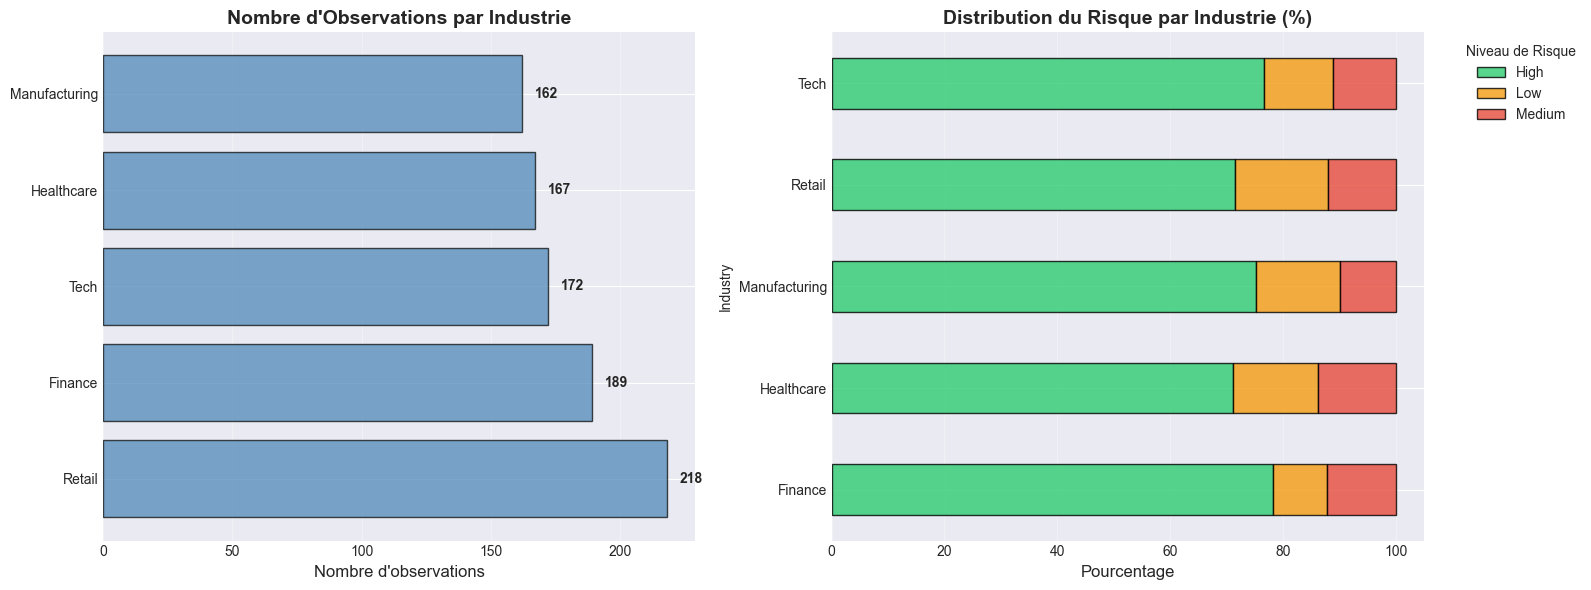


DISTRIBUTION DU RISQUE PAR INDUSTRIE
Risk_Label     High  Low  Medium  All
Industry                             
Finance         148   18      23  189
Healthcare      119   25      23  167
Manufacturing   122   24      16  162
Retail          156   36      26  218
Tech            132   21      19  172
All             677  124     107  908

Pourcentages :
Risk_Label          High        Low     Medium
Industry                                      
Finance        78.306878   9.523810  12.169312
Healthcare     71.257485  14.970060  13.772455
Manufacturing  75.308642  14.814815   9.876543
Retail         71.559633  16.513761  11.926606
Tech           76.744186  12.209302  11.046512


In [15]:
# Distribution par industrie
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Comptage par industrie
industry_counts = df['Industry'].value_counts()
axes[0].barh(industry_counts.index, industry_counts.values, color='steelblue', alpha=0.7, edgecolor='black')
axes[0].set_title('Nombre d\'Observations par Industrie', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Nombre d\'observations', fontsize=12)
axes[0].grid(axis='x', alpha=0.3)
for i, v in enumerate(industry_counts.values):
    axes[0].text(v + 5, i, str(v), va='center', fontweight='bold')

# Distribution du risque par industrie
risk_by_industry = pd.crosstab(df['Industry'], df['Risk_Label'], normalize='index') * 100
risk_by_industry.plot(kind='barh', stacked=True, ax=axes[1], 
                      color=['#2ecc71', '#f39c12', '#e74c3c'], alpha=0.8, edgecolor='black')
axes[1].set_title('Distribution du Risque par Industrie (%)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Pourcentage', fontsize=12)
axes[1].legend(title='Niveau de Risque', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "=" * 60)
print("DISTRIBUTION DU RISQUE PAR INDUSTRIE")
print("=" * 60)
print(pd.crosstab(df['Industry'], df['Risk_Label'], margins=True))
print("\nPourcentages :")
print(pd.crosstab(df['Industry'], df['Risk_Label'], normalize='index') * 100)


## 6. Relation entre Variables Numériques et Risk_Label


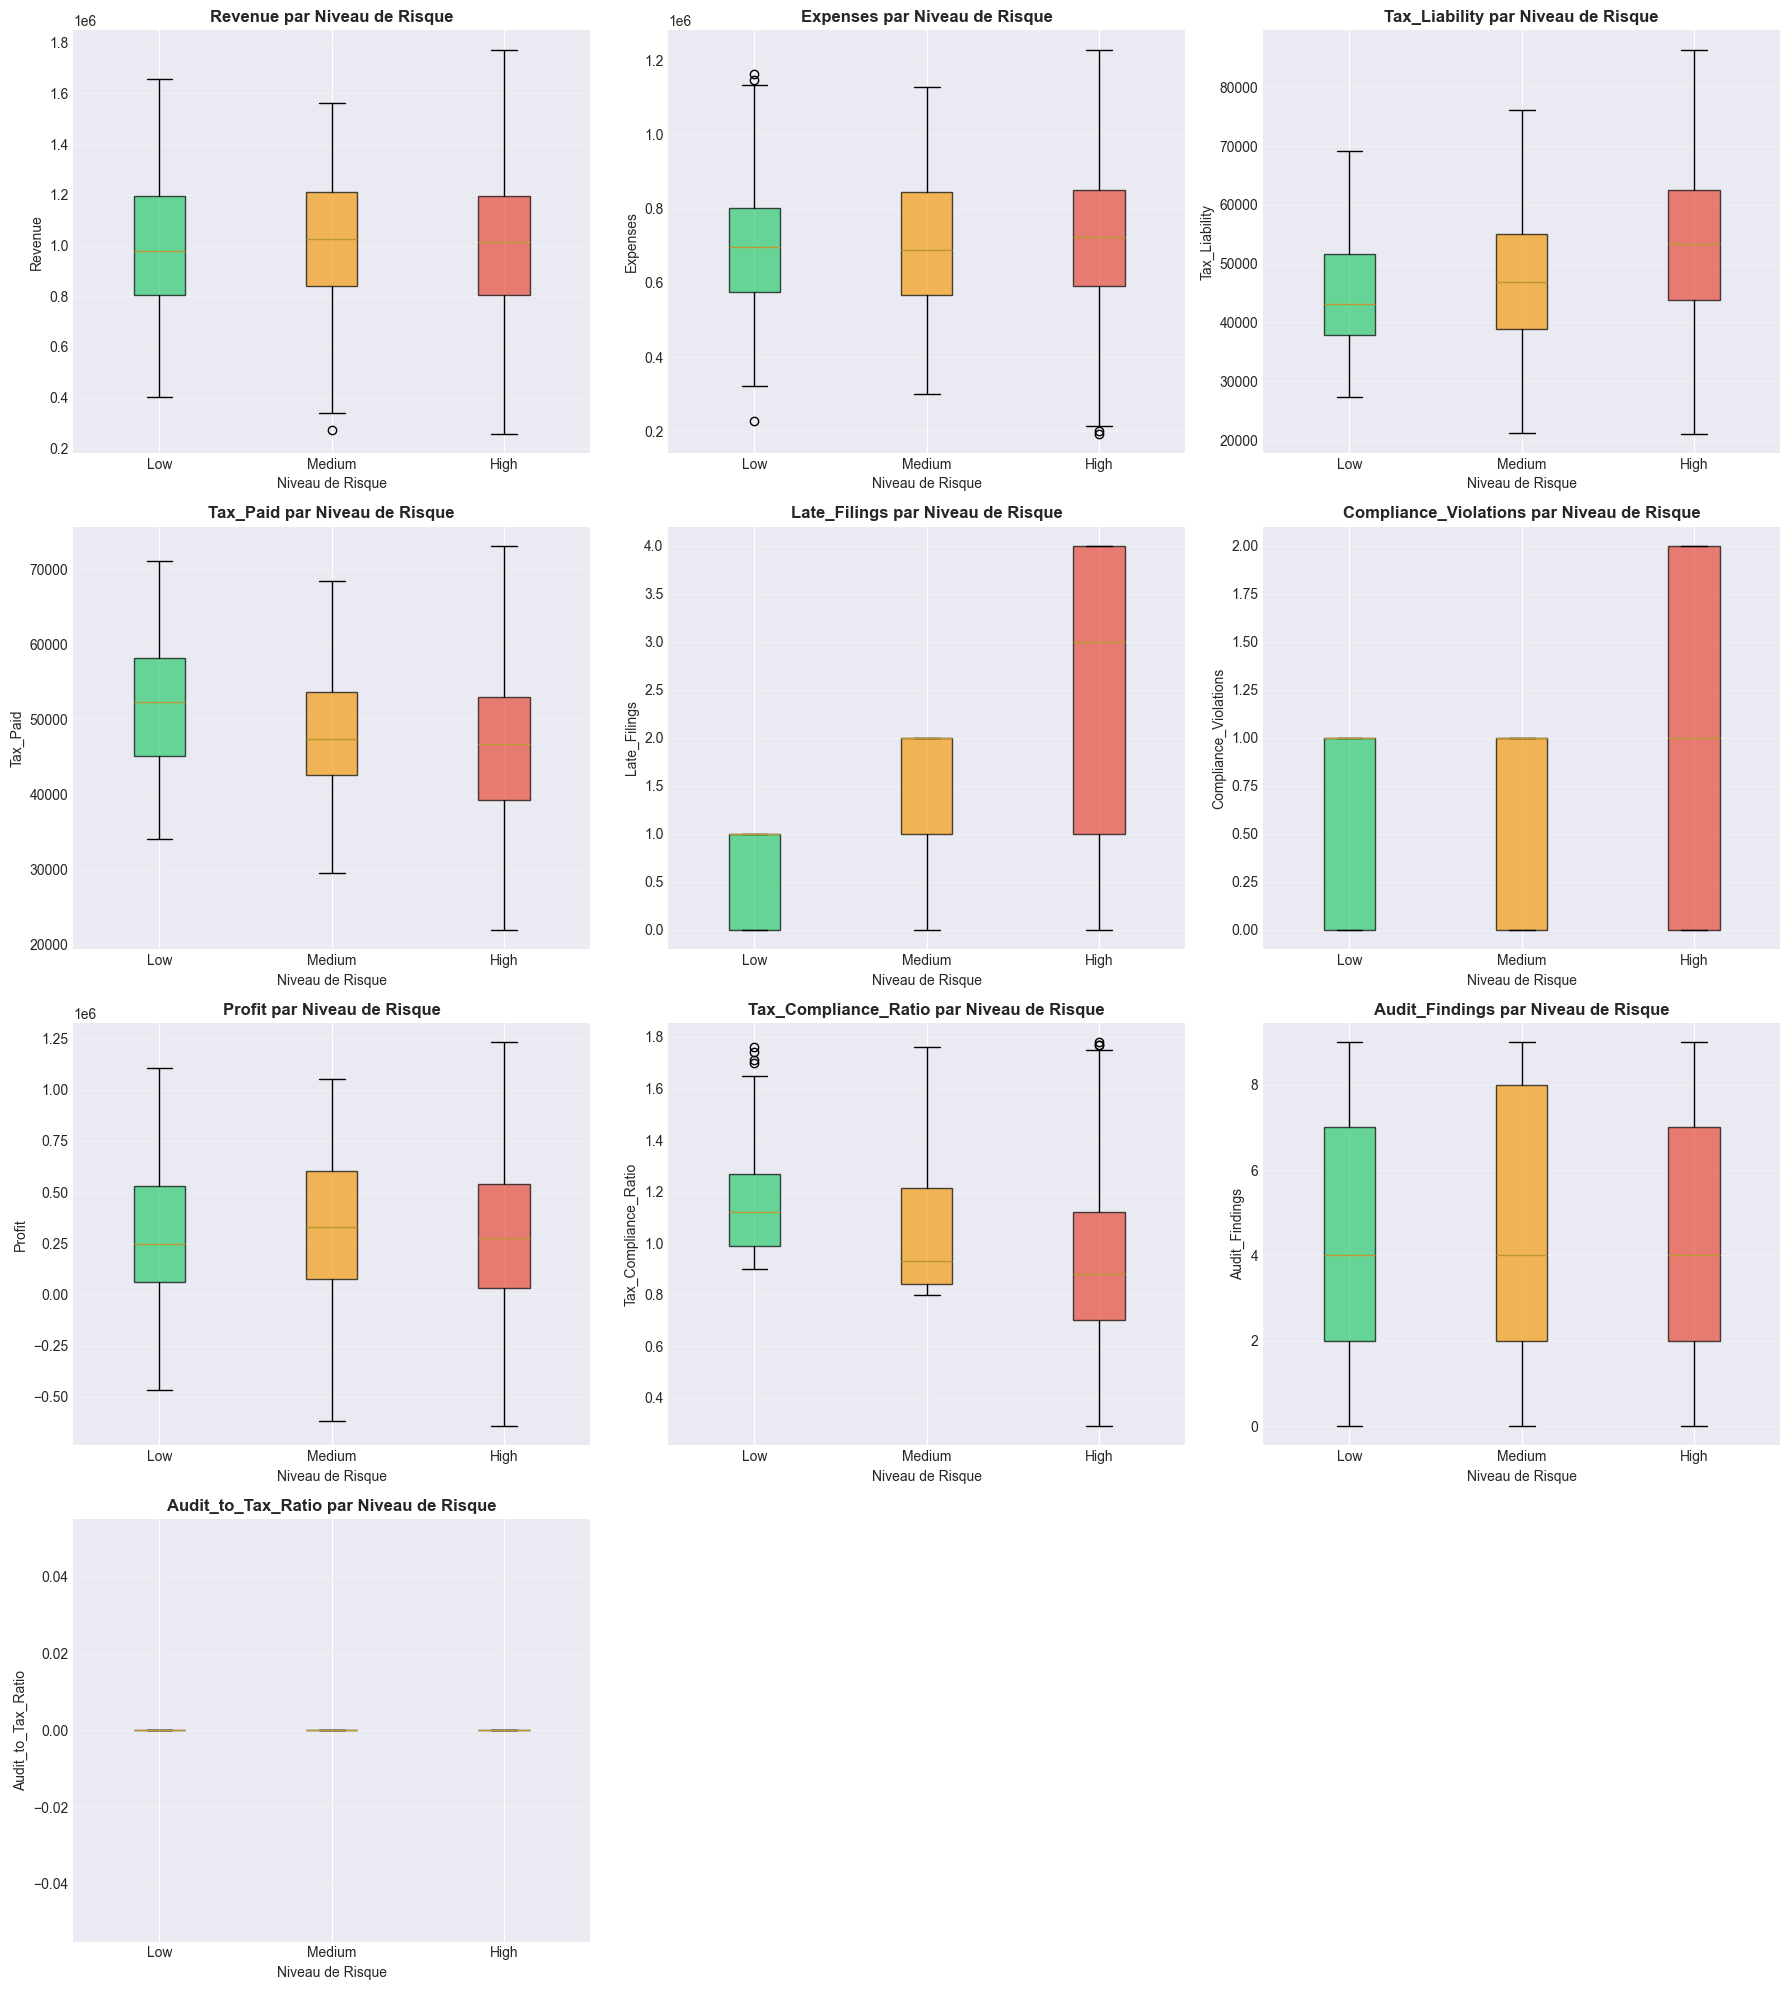

In [17]:
# Boxplots comparant les variables numériques par niveau de risque
n_cols = 3
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    ax = axes[i]
    
    # Créer les données pour chaque niveau de risque
    data_by_risk = [df[df['Risk_Label'] == risk][col].values 
                    for risk in ['Low', 'Medium', 'High']]
    
    bp = ax.boxplot(data_by_risk, tick_labels=['Low', 'Medium', 'High'], 
                    patch_artist=True, vert=True)
    
    # Colorier les boxplots
    colors_box = ['#2ecc71', '#f39c12', '#e74c3c']
    for patch, color in zip(bp['boxes'], colors_box):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)
    
    ax.set_title(f'{col} par Niveau de Risque', fontsize=12, fontweight='bold')
    ax.set_xlabel('Niveau de Risque', fontsize=10)
    ax.set_ylabel(col, fontsize=10)
    ax.grid(axis='y', alpha=0.3)

for i in range(len(numeric_cols), len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()


## 7. Statistiques par Niveau de Risque


In [18]:
# Statistiques descriptives groupées par niveau de risque
print("=" * 60)
print("STATISTIQUES PAR NIVEAU DE RISQUE")
print("=" * 60)

for risk_level in ['Low', 'Medium', 'High']:
    print(f"\n{'='*60}")
    print(f"NIVEAU DE RISQUE: {risk_level.upper()}")
    print(f"{'='*60}")
    risk_data = df[df['Risk_Label'] == risk_level][numeric_cols]
    print(risk_data.describe().round(2))


STATISTIQUES PAR NIVEAU DE RISQUE

NIVEAU DE RISQUE: LOW
          Revenue    Expenses  Tax_Liability  Tax_Paid  Late_Filings  \
count      124.00      124.00         124.00    124.00        124.00   
mean    991382.81   697445.08       45244.78  51752.41          0.52   
std     270915.32   187744.29        9296.02   8255.31          0.50   
min     403729.33   227413.51       27250.36  34140.12          0.00   
25%     803791.68   575869.38       37866.29  45178.68          0.00   
50%     976752.99   695749.42       43130.04  52333.98          1.00   
75%    1194272.42   803227.95       51586.84  58162.24          1.00   
max    1656940.88  1163865.91       69085.30  71079.16          1.00   

       Compliance_Violations      Profit  Tax_Compliance_Ratio  \
count                 124.00      124.00                124.00   
mean                    0.52   293937.73                  1.17   
std                     0.50   349419.26                  0.21   
min                     0.00  

## 8. Analyse des Variables de Conformité


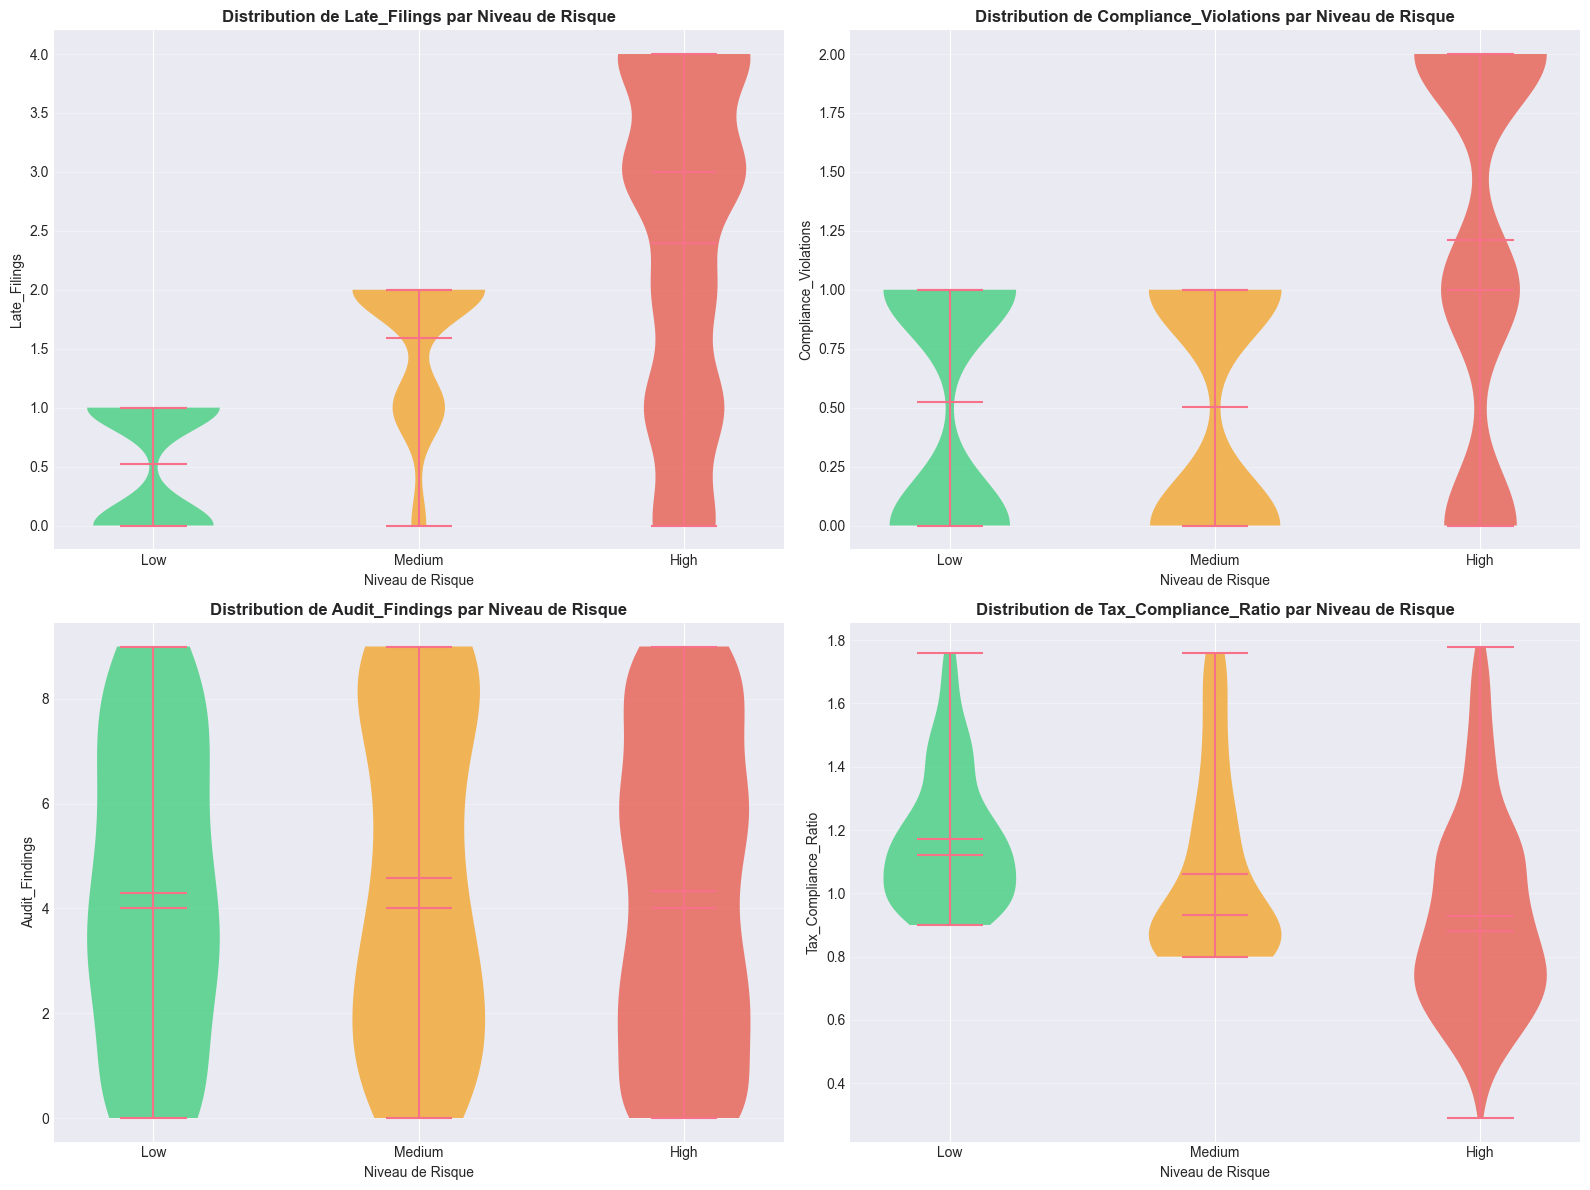


LATE_FILINGS PAR NIVEAU DE RISQUE
Risk_Label         High        Low     Medium
Late_Filings                                 
0             13.589365  47.580645   7.476636
1             17.282127  52.419355  26.168224
2             13.589365   0.000000  66.355140
3             26.587888   0.000000   0.000000
4             28.951256   0.000000   0.000000

COMPLIANCE_VIOLATIONS PAR NIVEAU DE RISQUE
Risk_Label                  High        Low    Medium
Compliance_Violations                                
0                      25.553914  47.580645  49.53271
1                      27.769572  52.419355  50.46729
2                      46.676514   0.000000   0.00000


In [19]:
# Analyse des variables liées à la conformité
compliance_vars = ['Late_Filings', 'Compliance_Violations', 'Audit_Findings', 'Tax_Compliance_Ratio']

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for i, var in enumerate(compliance_vars):
    ax = axes[i]
    
    # Violin plot pour montrer la distribution
    data_to_plot = [df[df['Risk_Label'] == risk][var].values 
                    for risk in ['Low', 'Medium', 'High']]
    
    parts = ax.violinplot(data_to_plot, positions=[1, 2, 3], 
                          showmeans=True, showmedians=True)
    
    # Colorier les violins
    colors_violin = ['#2ecc71', '#f39c12', '#e74c3c']
    for pc, color in zip(parts['bodies'], colors_violin):
        pc.set_facecolor(color)
        pc.set_alpha(0.7)
    
    ax.set_xticks([1, 2, 3])
    ax.set_xticklabels(['Low', 'Medium', 'High'])
    ax.set_title(f'Distribution de {var} par Niveau de Risque', 
                 fontsize=12, fontweight='bold')
    ax.set_xlabel('Niveau de Risque', fontsize=10)
    ax.set_ylabel(var, fontsize=10)
    ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Tableau croisé pour les variables discrètes
print("\n" + "=" * 60)
print("LATE_FILINGS PAR NIVEAU DE RISQUE")
print("=" * 60)
print(pd.crosstab(df['Late_Filings'], df['Risk_Label'], normalize='columns') * 100)

print("\n" + "=" * 60)
print("COMPLIANCE_VIOLATIONS PAR NIVEAU DE RISQUE")
print("=" * 60)
print(pd.crosstab(df['Compliance_Violations'], df['Risk_Label'], normalize='columns') * 100)


## 9. Scatter Plots - Relations Clés


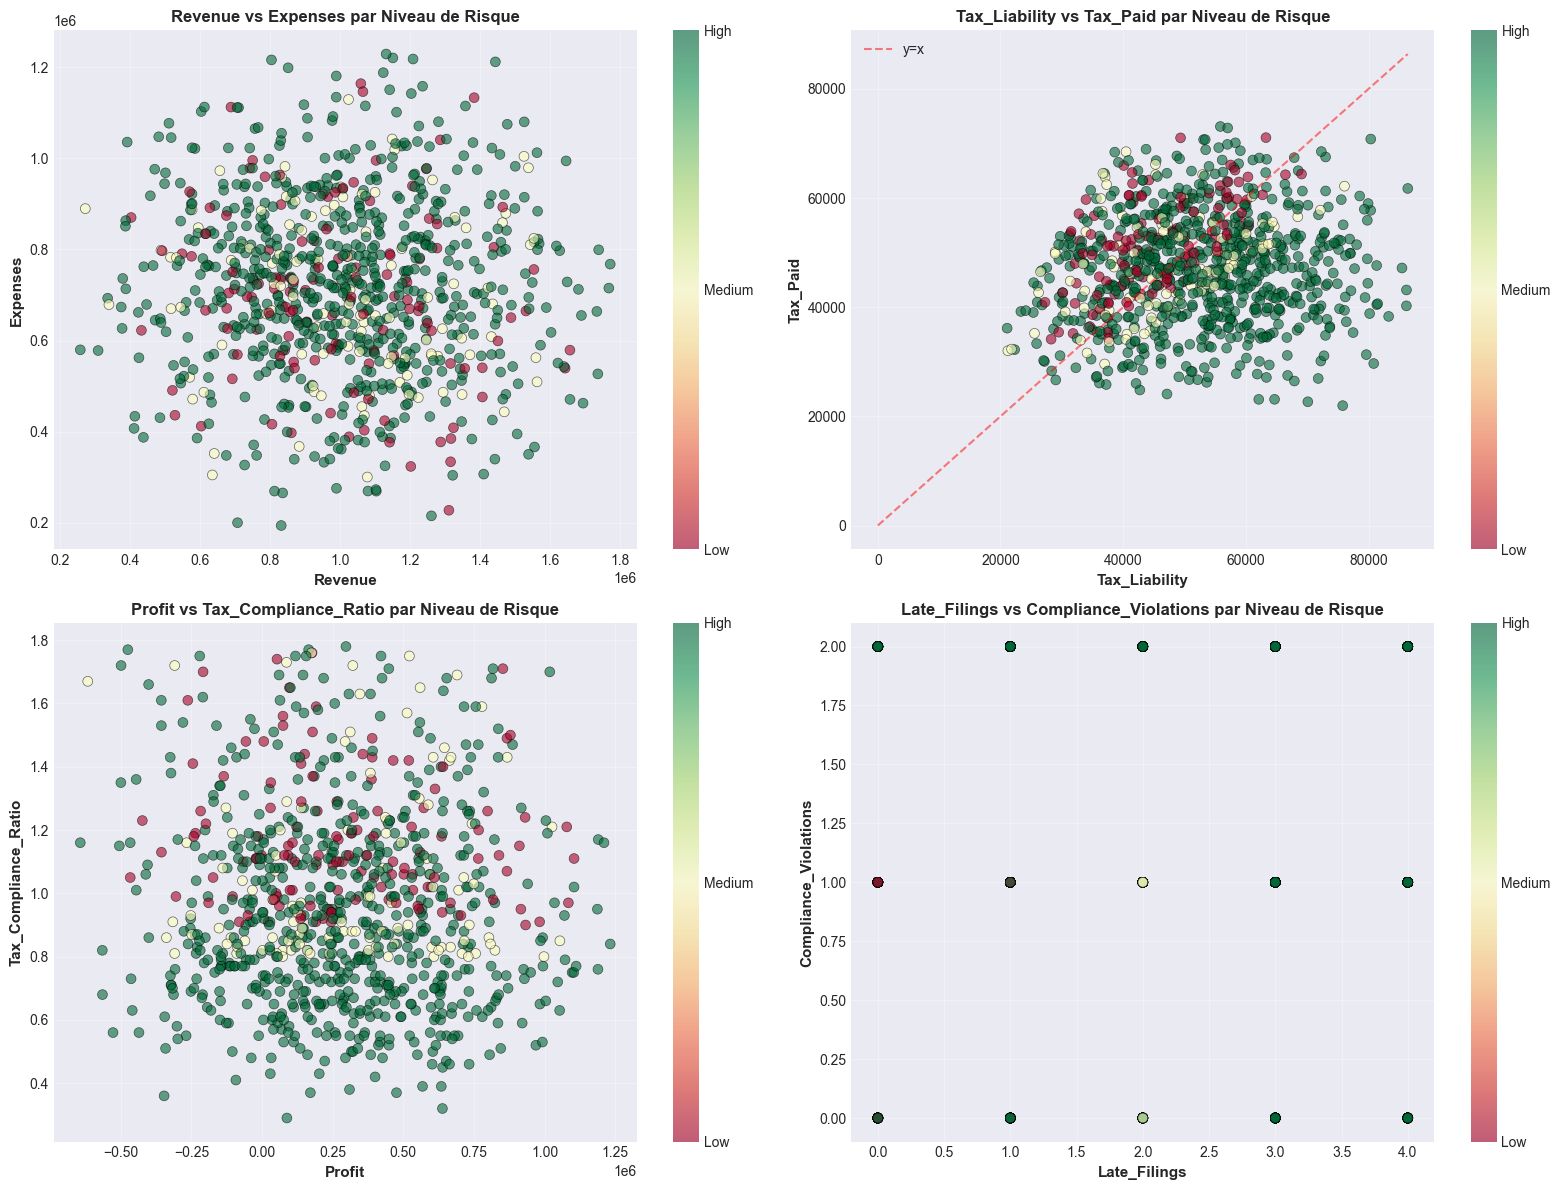

In [20]:
# Scatter plots pour les relations importantes
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Revenue vs Expenses coloré par Risk_Label
scatter1 = axes[0, 0].scatter(df['Revenue'], df['Expenses'], 
                              c=df['Risk_Label'].map({'Low': 0, 'Medium': 1, 'High': 2}),
                              cmap='RdYlGn', alpha=0.6, s=50, edgecolors='black', linewidth=0.5)
axes[0, 0].set_xlabel('Revenue', fontsize=11, fontweight='bold')
axes[0, 0].set_ylabel('Expenses', fontsize=11, fontweight='bold')
axes[0, 0].set_title('Revenue vs Expenses par Niveau de Risque', fontsize=12, fontweight='bold')
axes[0, 0].grid(alpha=0.3)
cbar1 = plt.colorbar(scatter1, ax=axes[0, 0])
cbar1.set_ticks([0, 1, 2])
cbar1.set_ticklabels(['Low', 'Medium', 'High'])

# 2. Tax_Liability vs Tax_Paid
scatter2 = axes[0, 1].scatter(df['Tax_Liability'], df['Tax_Paid'],
                              c=df['Risk_Label'].map({'Low': 0, 'Medium': 1, 'High': 2}),
                              cmap='RdYlGn', alpha=0.6, s=50, edgecolors='black', linewidth=0.5)
axes[0, 1].set_xlabel('Tax_Liability', fontsize=11, fontweight='bold')
axes[0, 1].set_ylabel('Tax_Paid', fontsize=11, fontweight='bold')
axes[0, 1].set_title('Tax_Liability vs Tax_Paid par Niveau de Risque', fontsize=12, fontweight='bold')
axes[0, 1].grid(alpha=0.3)
# Ligne y=x pour référence
max_val = max(df['Tax_Liability'].max(), df['Tax_Paid'].max())
axes[0, 1].plot([0, max_val], [0, max_val], 'r--', alpha=0.5, label='y=x')
axes[0, 1].legend()
cbar2 = plt.colorbar(scatter2, ax=axes[0, 1])
cbar2.set_ticks([0, 1, 2])
cbar2.set_ticklabels(['Low', 'Medium', 'High'])

# 3. Profit vs Tax_Compliance_Ratio
scatter3 = axes[1, 0].scatter(df['Profit'], df['Tax_Compliance_Ratio'],
                              c=df['Risk_Label'].map({'Low': 0, 'Medium': 1, 'High': 2}),
                              cmap='RdYlGn', alpha=0.6, s=50, edgecolors='black', linewidth=0.5)
axes[1, 0].set_xlabel('Profit', fontsize=11, fontweight='bold')
axes[1, 0].set_ylabel('Tax_Compliance_Ratio', fontsize=11, fontweight='bold')
axes[1, 0].set_title('Profit vs Tax_Compliance_Ratio par Niveau de Risque', fontsize=12, fontweight='bold')
axes[1, 0].grid(alpha=0.3)
cbar3 = plt.colorbar(scatter3, ax=axes[1, 0])
cbar3.set_ticks([0, 1, 2])
cbar3.set_ticklabels(['Low', 'Medium', 'High'])

# 4. Late_Filings vs Compliance_Violations
scatter4 = axes[1, 1].scatter(df['Late_Filings'], df['Compliance_Violations'],
                              c=df['Risk_Label'].map({'Low': 0, 'Medium': 1, 'High': 2}),
                              cmap='RdYlGn', alpha=0.6, s=50, edgecolors='black', linewidth=0.5)
axes[1, 1].set_xlabel('Late_Filings', fontsize=11, fontweight='bold')
axes[1, 1].set_ylabel('Compliance_Violations', fontsize=11, fontweight='bold')
axes[1, 1].set_title('Late_Filings vs Compliance_Violations par Niveau de Risque', fontsize=12, fontweight='bold')
axes[1, 1].grid(alpha=0.3)
cbar4 = plt.colorbar(scatter4, ax=axes[1, 1])
cbar4.set_ticks([0, 1, 2])
cbar4.set_ticklabels(['Low', 'Medium', 'High'])

plt.tight_layout()
plt.show()


# 10. Conclusions on EDA

In [21]:
print("=" * 60)
print("RÉSUMÉ DES INSIGHTS CLÉS")
print("=" * 60)

print("\n1. DISTRIBUTION DE LA VARIABLE CIBLE :")
print(f"   - High Risk: {len(df[df['Risk_Label']=='High'])} ({len(df[df['Risk_Label']=='High'])/len(df)*100:.1f}%)")
print(f"   - Medium Risk: {len(df[df['Risk_Label']=='Medium'])} ({len(df[df['Risk_Label']=='Medium'])/len(df)*100:.1f}%)")
print(f"   - Low Risk: {len(df[df['Risk_Label']=='Low'])} ({len(df[df['Risk_Label']=='Low'])/len(df)*100:.1f}%)")
print("   ⚠️  Déséquilibre de classes détecté - considérer le rééchantillonnage ou le class_weight")

print("\n2. VARIABLES AVEC CORRÉLATIONS FORTES :")
strong_corr = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_val = correlation_matrix.iloc[i, j]
        if abs(corr_val) > 0.5:
            strong_corr.append((correlation_matrix.columns[i], correlation_matrix.columns[j], corr_val))
            print(f"   - {correlation_matrix.columns[i]} ↔ {correlation_matrix.columns[j]}: {corr_val:.3f}")

if not strong_corr:
    print("   - Aucune corrélation très forte détectée")

print("\n3. OUTLIERS DÉTECTÉS :")
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)]
    if len(outliers) > 0:
        print(f"   - {col}: {len(outliers)} outliers ({len(outliers)/len(df)*100:.1f}%)")

print("\n4. DISTRIBUTION PAR INDUSTRIE :")
for industry in df['Industry'].unique():
    count = len(df[df['Industry'] == industry])
    print(f"   - {industry}: {count} observations ({count/len(df)*100:.1f}%)")

print("\n5. VARIABLES IMPORTANTES POUR LA PRÉDICTION :")
print("   Basé sur l'analyse visuelle, les variables suivantes semblent discriminantes :")
print("   - Tax_Compliance_Ratio (ratio de conformité fiscale)")
print("   - Late_Filings (retards de déclaration)")
print("   - Compliance_Violations (violations de conformité)")
print("   - Audit_Findings (constats d'audit)")
print("   - Profit (bénéfice)")
print("   - Tax_Paid vs Tax_Liability (écart entre payé et dû)")

print("\n" + "=" * 60)


RÉSUMÉ DES INSIGHTS CLÉS

1. DISTRIBUTION DE LA VARIABLE CIBLE :
   - High Risk: 677 (74.6%)
   - Medium Risk: 107 (11.8%)
   - Low Risk: 124 (13.7%)
   ⚠️  Déséquilibre de classes détecté - considérer le rééchantillonnage ou le class_weight

2. VARIABLES AVEC CORRÉLATIONS FORTES :
   - Revenue ↔ Profit: 0.839
   - Expenses ↔ Profit: -0.578
   - Tax_Liability ↔ Tax_Compliance_Ratio: -0.741
   - Tax_Paid ↔ Tax_Compliance_Ratio: 0.536

3. OUTLIERS DÉTECTÉS :
   - Tax_Compliance_Ratio: 1 outliers (0.1%)

4. DISTRIBUTION PAR INDUSTRIE :
   - Finance: 189 observations (20.8%)
   - Retail: 218 observations (24.0%)
   - Manufacturing: 162 observations (17.8%)
   - Healthcare: 167 observations (18.4%)
   - Tech: 172 observations (18.9%)

5. VARIABLES IMPORTANTES POUR LA PRÉDICTION :
   Basé sur l'analyse visuelle, les variables suivantes semblent discriminantes :
   - Tax_Compliance_Ratio (ratio de conformité fiscale)
   - Late_Filings (retards de déclaration)
   - Compliance_Violations (viola

# III / Data Processing

# 1. basic data processing operations 

In [ ]:
#looking for missing values
missing_values = df.isnull().sum()

print("Missing values in each column:\n", missing_values)

Missing values in each column:
 Revenue                  0
Expenses                 0
Tax_Liability            0
Tax_Paid                 0
Late_Filings             0
Compliance_Violations    0
Industry                 0
Profit                   0
Tax_Compliance_Ratio     0
Audit_Findings           0
Audit_to_Tax_Ratio       0
Risk_Label               0
dtype: int64


In [ ]:
#looking for duplicates
duplicates = df.duplicated()
num_duplicates = duplicates.sum()
if num_duplicates > 0:
    print(f"Number of duplicate rows: {num_duplicates}")
    display(df[duplicates])
else:
    print("No duplicate rows found.")


No duplicate rows found.


We have already find and deleted outliers in the EDA.

In [25]:
# Encoding categorical variables
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print("Categorical columns to encode:", categorical_cols)

# Create encoders for each categorical column
encoders = {}
df_encoded = df.copy()

for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col + '_encoded'] = le.fit_transform(df_encoded[col])
    encoders[col] = le
    print(f"\nEncoding for {col}:")
    print(f"  Mapping: {dict(zip(le.classes_, range(len(le.classes_))))}")

# Show a preview of the encoded data
print("\n" + "="*60)
print("ENCODED DATA PREVIEW")
print("="*60)
print(df_encoded[[col for col in df_encoded.columns if 'encoded' in col or col in categorical_cols]].head(10))

# Update the main dataframe
df = df_encoded.copy()
print("\n✅ Encoding completed!")


Categorical columns to encode: ['Industry', 'Risk_Label']

Encoding for Industry:
  Mapping: {'Finance': 0, 'Healthcare': 1, 'Manufacturing': 2, 'Retail': 3, 'Tech': 4}

Encoding for Risk_Label:
  Mapping: {'High': 0, 'Low': 1, 'Medium': 2}

ENCODED DATA PREVIEW
        Industry Risk_Label  Industry_encoded  Risk_Label_encoded
0        Finance       High                 0                   0
1         Retail     Medium                 3                   2
2  Manufacturing       High                 2                   0
3        Finance       High                 0                   0
4  Manufacturing       High                 2                   0
5     Healthcare     Medium                 1                   2
6        Finance       High                 0                   0
7     Healthcare       High                 1                   0
8     Healthcare       High                 1                   0
9         Retail       High                 3                   0

✅ Encoding

In [27]:
# V / Machine Learning Pipeline: Model Selection and Evaluation

# Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
import warnings
warnings.filterwarnings('ignore')


In [28]:
# Define features and target
feature_cols = [col for col in df.columns if col not in ['Industry', 'Risk_Label', 'Risk_Label_encoded']]
X = df[feature_cols]
y = df['Risk_Label_encoded']

print("="*70)
print("DATA PREPARATION")
print("="*70)
print(f"Features: {len(feature_cols)}")
print(f"Feature names: {feature_cols}")
print(f"\nTarget distribution:")
print(y.value_counts().sort_index())
print(f"\nDataset shape: {X.shape}")

# Split data (before scaling to avoid data leakage)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nTrain set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")


DATA PREPARATION
Features: 11
Feature names: ['Revenue', 'Expenses', 'Tax_Liability', 'Tax_Paid', 'Late_Filings', 'Compliance_Violations', 'Profit', 'Tax_Compliance_Ratio', 'Audit_Findings', 'Audit_to_Tax_Ratio', 'Industry_encoded']

Target distribution:
Risk_Label_encoded
0    677
1    124
2    107
Name: count, dtype: int64

Dataset shape: (908, 11)

Train set: 726 samples
Test set: 182 samples


In [29]:
# Define scalers and classifiers to test
scalers = {
    'StandardScaler': StandardScaler(),
    'MinMaxScaler': MinMaxScaler()
}

classifiers = {
    'LogisticRegression': LogisticRegression(max_iter=1000, random_state=42),
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'GradientBoosting': GradientBoostingClassifier(random_state=42)
}

print("Scalers to test:", list(scalers.keys()))
print("Classifiers to test:", list(classifiers.keys()))
print(f"\nTotal combinations: {len(scalers) * len(classifiers)}")


Scalers to test: ['StandardScaler', 'MinMaxScaler']
Classifiers to test: ['LogisticRegression', 'RandomForest', 'SVM', 'KNN', 'GradientBoosting']

Total combinations: 10


In [30]:
# Test all combinations
print("="*70)
print("TESTING ALL COMBINATIONS")
print("="*70)

results = []

for scaler_name, scaler in scalers.items():
    for clf_name, classifier in classifiers.items():
        # Create pipeline
        pipeline = Pipeline([
            ('scaler', scaler),
            ('classifier', classifier)
        ])
        
        # Train and evaluate
        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)
        
        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='weighted')
        
        # Cross-validation score
        cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')
        cv_mean = cv_scores.mean()
        cv_std = cv_scores.std()
        
        results.append({
            'Scaler': scaler_name,
            'Classifier': clf_name,
            'Accuracy': accuracy,
            'F1_Score': f1,
            'CV_Mean': cv_mean,
            'CV_Std': cv_std
        })
        
        print(f"{scaler_name:15} + {clf_name:20} | Accuracy: {accuracy:.4f} | F1: {f1:.4f} | CV: {cv_mean:.4f} (±{cv_std:.4f})")


TESTING ALL COMBINATIONS
StandardScaler  + LogisticRegression   | Accuracy: 0.8407 | F1: 0.8088 | CV: 0.8319 (±0.0219)
StandardScaler  + RandomForest         | Accuracy: 1.0000 | F1: 1.0000 | CV: 0.9945 (±0.0068)
StandardScaler  + SVM                  | Accuracy: 0.9066 | F1: 0.9001 | CV: 0.8994 (±0.0173)
StandardScaler  + KNN                  | Accuracy: 0.8626 | F1: 0.8439 | CV: 0.8333 (±0.0160)
StandardScaler  + GradientBoosting     | Accuracy: 1.0000 | F1: 1.0000 | CV: 1.0000 (±0.0000)
MinMaxScaler    + LogisticRegression   | Accuracy: 0.8187 | F1: 0.7710 | CV: 0.8306 (±0.0179)
MinMaxScaler    + RandomForest         | Accuracy: 0.9945 | F1: 0.9945 | CV: 0.9959 (±0.0055)
MinMaxScaler    + SVM                  | Accuracy: 0.9286 | F1: 0.9262 | CV: 0.9215 (±0.0142)
MinMaxScaler    + KNN                  | Accuracy: 0.8791 | F1: 0.8701 | CV: 0.8595 (±0.0113)
MinMaxScaler    + GradientBoosting     | Accuracy: 0.9945 | F1: 0.9945 | CV: 1.0000 (±0.0000)


In [31]:
# Convert results to DataFrame and find best model
results_df = pd.DataFrame(results)
results_df = results_df.sort_values('Accuracy', ascending=False)

print("="*70)
print("RESULTS SUMMARY")
print("="*70)
print(results_df.to_string(index=False))

# Get best model
best_result = results_df.iloc[0]
best_scaler = best_result['Scaler']
best_clf = best_result['Classifier']

print("\n" + "="*70)
print("BEST MODEL")
print("="*70)
print(f"Scaler: {best_scaler}")
print(f"Classifier: {best_clf}")
print(f"Accuracy: {best_result['Accuracy']:.4f}")
print(f"F1 Score: {best_result['F1_Score']:.4f}")
print(f"Cross-Validation: {best_result['CV_Mean']:.4f} (±{best_result['CV_Std']:.4f})")


RESULTS SUMMARY
        Scaler         Classifier  Accuracy  F1_Score  CV_Mean   CV_Std
StandardScaler       RandomForest  1.000000  1.000000 0.994483 0.006757
StandardScaler   GradientBoosting  1.000000  1.000000 1.000000 0.000000
  MinMaxScaler   GradientBoosting  0.994505  0.994513 1.000000 0.000000
  MinMaxScaler       RandomForest  0.994505  0.994513 0.995862 0.005517
  MinMaxScaler                SVM  0.928571  0.926246 0.921483 0.014223
StandardScaler                SVM  0.906593  0.900057 0.899443 0.017261
  MinMaxScaler                KNN  0.879121  0.870104 0.859499 0.011258
StandardScaler                KNN  0.862637  0.843943 0.833330 0.015993
StandardScaler LogisticRegression  0.840659  0.808767 0.831923 0.021851
  MinMaxScaler LogisticRegression  0.818681  0.771014 0.830562 0.017911

BEST MODEL
Scaler: StandardScaler
Classifier: RandomForest
Accuracy: 1.0000
F1 Score: 1.0000
Cross-Validation: 0.9945 (±0.0068)


In [32]:
# Train best model and get detailed evaluation
best_pipeline = Pipeline([
    ('scaler', scalers[best_scaler]),
    ('classifier', classifiers[best_clf])
])

best_pipeline.fit(X_train, y_train)
y_pred_best = best_pipeline.predict(X_test)

print("="*70)
print("DETAILED CLASSIFICATION REPORT")
print("="*70)
print(classification_report(y_test, y_pred_best, 
                          target_names=['High', 'Low', 'Medium']))

print("\n" + "="*70)
print("CONFUSION MATRIX")
print("="*70)
cm = confusion_matrix(y_test, y_pred_best)
print(cm)


DETAILED CLASSIFICATION REPORT
              precision    recall  f1-score   support

        High       1.00      1.00      1.00       136
         Low       1.00      1.00      1.00        25
      Medium       1.00      1.00      1.00        21

    accuracy                           1.00       182
   macro avg       1.00      1.00      1.00       182
weighted avg       1.00      1.00      1.00       182


CONFUSION MATRIX
[[136   0   0]
 [  0  25   0]
 [  0   0  21]]


# VI / Détection et Prévention du Biais et du Surapprentissage


## 1. Détection du Surapprentissage : Comparaison Train vs Validation vs Test


In [33]:
# Créer un ensemble de validation supplémentaire
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Split: Train (60%) -> Validation (20%) -> Test (20%)
X_train_new, X_temp, y_train_new, y_temp = train_test_split(
    X, y, test_size=0.4, random_state=42, stratify=y
)
X_val, X_test_new, y_val, y_test_new = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

print("="*70)
print("NOUVEAUX ENSEMBLES DE DONNÉES")
print("="*70)
print(f"Train: {X_train_new.shape[0]} échantillons ({X_train_new.shape[0]/len(X)*100:.1f}%)")
print(f"Validation: {X_val.shape[0]} échantillons ({X_val.shape[0]/len(X)*100:.1f}%)")
print(f"Test: {X_test_new.shape[0]} échantillons ({X_test_new.shape[0]/len(X)*100:.1f}%)")

print("\nDistribution des classes dans chaque ensemble:")
print("\nTrain:")
print(y_train_new.value_counts().sort_index())
print("\nValidation:")
print(y_val.value_counts().sort_index())
print("\nTest:")
print(y_test_new.value_counts().sort_index())


NOUVEAUX ENSEMBLES DE DONNÉES
Train: 544 échantillons (59.9%)
Validation: 182 échantillons (20.0%)
Test: 182 échantillons (20.0%)

Distribution des classes dans chaque ensemble:

Train:
Risk_Label_encoded
0    406
1     74
2     64
Name: count, dtype: int64

Validation:
Risk_Label_encoded
0    135
1     25
2     22
Name: count, dtype: int64

Test:
Risk_Label_encoded
0    136
1     25
2     21
Name: count, dtype: int64


In [34]:
# Tester les modèles avec comparaison Train/Validation/Test
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

print("="*70)
print("DÉTECTION DU SURAPPRENTISSAGE")
print("="*70)
print("\n⚠️  SIGNES DE SURAPPRENTISSAGE:")
print("   - Accuracy Train >> Accuracy Validation")
print("   - Accuracy Train >> Accuracy Test")
print("   - Écart > 5-10% indique un problème\n")

models_to_test = {
    'RandomForest (sans régularisation)': RandomForestClassifier(
        n_estimators=100, 
        max_depth=None,  # Pas de limite = risque de surapprentissage
        min_samples_split=2,
        min_samples_leaf=1,
        random_state=42
    ),
    'RandomForest (régularisé)': RandomForestClassifier(
        n_estimators=100,
        max_depth=10,  # Limite la profondeur
        min_samples_split=10,  # Plus d'échantillons requis pour split
        min_samples_leaf=5,  # Plus d'échantillons par feuille
        random_state=42
    ),
    'GradientBoosting (sans régularisation)': GradientBoostingClassifier(
        n_estimators=100,
        max_depth=None,
        learning_rate=0.1,
        random_state=42
    ),
    'GradientBoosting (régularisé)': GradientBoostingClassifier(
        n_estimators=100,
        max_depth=5,  # Limite la profondeur
        learning_rate=0.05,  # Learning rate plus faible
        min_samples_split=10,
        min_samples_leaf=5,
        subsample=0.8,  # Utilise 80% des données par arbre
        random_state=42
    )
}

results_overfitting = []

for model_name, model in models_to_test.items():
    # Créer pipeline avec scaler
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', model)
    ])
    
    # Entraîner
    pipeline.fit(X_train_new, y_train_new)
    
    # Prédictions sur les 3 ensembles
    y_pred_train = pipeline.predict(X_train_new)
    y_pred_val = pipeline.predict(X_val)
    y_pred_test = pipeline.predict(X_test_new)
    
    # Calculer les métriques
    acc_train = accuracy_score(y_train_new, y_pred_train)
    acc_val = accuracy_score(y_val, y_pred_val)
    acc_test = accuracy_score(y_test_new, y_pred_test)
    
    f1_train = f1_score(y_train_new, y_pred_train, average='weighted')
    f1_val = f1_score(y_val, y_pred_val, average='weighted')
    f1_test = f1_score(y_test_new, y_pred_test, average='weighted')
    
    # Calculer l'écart (signe de surapprentissage)
    gap_train_val = acc_train - acc_val
    gap_train_test = acc_train - acc_test
    
    results_overfitting.append({
        'Model': model_name,
        'Acc_Train': acc_train,
        'Acc_Val': acc_val,
        'Acc_Test': acc_test,
        'Gap_Train_Val': gap_train_val,
        'Gap_Train_Test': gap_train_test,
        'F1_Train': f1_train,
        'F1_Val': f1_val,
        'F1_Test': f1_test
    })
    
    # Afficher les résultats
    print(f"\n{model_name}:")
    print(f"  Train Accuracy: {acc_train:.4f} | F1: {f1_train:.4f}")
    print(f"  Val   Accuracy: {acc_val:.4f} | F1: {f1_val:.4f} | Écart: {gap_train_val:+.4f}")
    print(f"  Test  Accuracy: {acc_test:.4f} | F1: {f1_test:.4f} | Écart: {gap_train_test:+.4f}")
    
    if gap_train_val > 0.05 or gap_train_test > 0.05:
        print(f"  ⚠️  SURAPPRENTISSAGE DÉTECTÉ! (écart > 5%)")
    else:
        print(f"  ✅ Pas de surapprentissage significatif")

results_overfitting_df = pd.DataFrame(results_overfitting)


DÉTECTION DU SURAPPRENTISSAGE

⚠️  SIGNES DE SURAPPRENTISSAGE:
   - Accuracy Train >> Accuracy Validation
   - Accuracy Train >> Accuracy Test
   - Écart > 5-10% indique un problème


RandomForest (sans régularisation):
  Train Accuracy: 1.0000 | F1: 1.0000
  Val   Accuracy: 0.9945 | F1: 0.9945 | Écart: +0.0055
  Test  Accuracy: 1.0000 | F1: 1.0000 | Écart: +0.0000
  ✅ Pas de surapprentissage significatif

RandomForest (régularisé):
  Train Accuracy: 1.0000 | F1: 1.0000
  Val   Accuracy: 0.9945 | F1: 0.9945 | Écart: +0.0055
  Test  Accuracy: 1.0000 | F1: 1.0000 | Écart: +0.0000
  ✅ Pas de surapprentissage significatif

GradientBoosting (sans régularisation):
  Train Accuracy: 1.0000 | F1: 1.0000
  Val   Accuracy: 0.9945 | F1: 0.9945 | Écart: +0.0055
  Test  Accuracy: 1.0000 | F1: 1.0000 | Écart: +0.0000
  ✅ Pas de surapprentissage significatif

GradientBoosting (régularisé):
  Train Accuracy: 1.0000 | F1: 1.0000
  Val   Accuracy: 0.9945 | F1: 0.9945 | Écart: +0.0055
  Test  Accuracy: 1

## 2. Gestion du Déséquilibre de Classes


In [35]:
# Techniques pour gérer le déséquilibre de classes
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ImbPipeline
from collections import Counter

print("="*70)
print("GESTION DU DÉSÉQUILIBRE DE CLASSES")
print("="*70)

# Distribution originale
print("\nDistribution originale (Train):")
print(Counter(y_train_new))

# 1. Utiliser class_weight='balanced' (plus simple)
print("\n" + "="*70)
print("MÉTHODE 1: class_weight='balanced'")
print("="*70)

rf_balanced = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=5,
    class_weight='balanced',  # Poids inversement proportionnel à la fréquence
    random_state=42
)

pipeline_balanced = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', rf_balanced)
])

pipeline_balanced.fit(X_train_new, y_train_new)
y_pred_balanced = pipeline_balanced.predict(X_test_new)

print("\nRésultats avec class_weight='balanced':")
print(classification_report(y_test_new, y_pred_balanced, 
                          target_names=['High', 'Low', 'Medium']))


GESTION DU DÉSÉQUILIBRE DE CLASSES

Distribution originale (Train):
Counter({0: 406, 1: 74, 2: 64})

MÉTHODE 1: class_weight='balanced'

Résultats avec class_weight='balanced':
              precision    recall  f1-score   support

        High       1.00      1.00      1.00       136
         Low       1.00      1.00      1.00        25
      Medium       1.00      1.00      1.00        21

    accuracy                           1.00       182
   macro avg       1.00      1.00      1.00       182
weighted avg       1.00      1.00      1.00       182



In [36]:
# 2. SMOTE (Synthetic Minority Oversampling Technique)
print("\n" + "="*70)
print("MÉTHODE 2: SMOTE (Oversampling)")
print("="*70)

# Note: SMOTE doit être appliqué APRÈS le split mais AVANT le scaling dans le pipeline
from imblearn.over_sampling import SMOTE

# Appliquer SMOTE sur les données d'entraînement
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_new, y_train_new)

print("Distribution après SMOTE:")
print(Counter(y_train_smote))

# Entraîner avec les données rééquilibrées
rf_smote = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)

pipeline_smote = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', rf_smote)
])

pipeline_smote.fit(X_train_smote, y_train_smote)
y_pred_smote = pipeline_smote.predict(X_test_new)

print("\nRésultats avec SMOTE:")
print(classification_report(y_test_new, y_pred_smote, 
                          target_names=['High', 'Low', 'Medium']))



MÉTHODE 2: SMOTE (Oversampling)
Distribution après SMOTE:
Counter({0: 406, 1: 406, 2: 406})

Résultats avec SMOTE:
              precision    recall  f1-score   support

        High       1.00      1.00      1.00       136
         Low       1.00      0.96      0.98        25
      Medium       0.95      1.00      0.98        21

    accuracy                           0.99       182
   macro avg       0.98      0.99      0.99       182
weighted avg       0.99      0.99      0.99       182



In [37]:
# 3. Comparaison des méthodes
print("="*70)
print("COMPARAISON DES MÉTHODES")
print("="*70)

methods_comparison = []

# Modèle sans gestion du déséquilibre
rf_baseline = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)
pipeline_baseline = Pipeline([('scaler', StandardScaler()), ('classifier', rf_baseline)])
pipeline_baseline.fit(X_train_new, y_train_new)
y_pred_baseline = pipeline_baseline.predict(X_test_new)

methods = [
    ('Baseline (pas de gestion)', y_pred_baseline),
    ('class_weight=balanced', y_pred_balanced),
    ('SMOTE', y_pred_smote)
]

for method_name, y_pred in methods:
    acc = accuracy_score(y_test_new, y_pred)
    f1_macro = f1_score(y_test_new, y_pred, average='macro')  # Macro pour les classes minoritaires
    f1_weighted = f1_score(y_test_new, y_pred, average='weighted')
    
    # F1 par classe
    f1_per_class = f1_score(y_test_new, y_pred, average=None, labels=[0, 1, 2])
    
    methods_comparison.append({
        'Méthode': method_name,
        'Accuracy': acc,
        'F1_Macro': f1_macro,
        'F1_Weighted': f1_weighted,
        'F1_High': f1_per_class[0],
        'F1_Low': f1_per_class[1],
        'F1_Medium': f1_per_class[2]
    })
    
    print(f"\n{method_name}:")
    print(f"  Accuracy: {acc:.4f}")
    print(f"  F1 Macro: {f1_macro:.4f} (moyenne non pondérée - important pour classes minoritaires)")
    print(f"  F1 Weighted: {f1_weighted:.4f}")
    print(f"  F1 par classe - High: {f1_per_class[0]:.4f}, Low: {f1_per_class[1]:.4f}, Medium: {f1_per_class[2]:.4f}")

comparison_df = pd.DataFrame(methods_comparison)
print("\n" + "="*70)
print("RÉSUMÉ")
print("="*70)
print(comparison_df.to_string(index=False))


COMPARAISON DES MÉTHODES

Baseline (pas de gestion):
  Accuracy: 1.0000
  F1 Macro: 1.0000 (moyenne non pondérée - important pour classes minoritaires)
  F1 Weighted: 1.0000
  F1 par classe - High: 1.0000, Low: 1.0000, Medium: 1.0000

class_weight=balanced:
  Accuracy: 1.0000
  F1 Macro: 1.0000 (moyenne non pondérée - important pour classes minoritaires)
  F1 Weighted: 1.0000
  F1 par classe - High: 1.0000, Low: 1.0000, Medium: 1.0000

SMOTE:
  Accuracy: 0.9945
  F1 Macro: 0.9854 (moyenne non pondérée - important pour classes minoritaires)
  F1 Weighted: 0.9945
  F1 par classe - High: 1.0000, Low: 0.9796, Medium: 0.9767

RÉSUMÉ
                  Méthode  Accuracy  F1_Macro  F1_Weighted  F1_High   F1_Low  F1_Medium
Baseline (pas de gestion)  1.000000  1.000000     1.000000      1.0 1.000000   1.000000
    class_weight=balanced  1.000000  1.000000     1.000000      1.0 1.000000   1.000000
                    SMOTE  0.994505  0.985445     0.994513      1.0 0.979592   0.976744


All tested methods, including the baseline model without imbalance handling, show perfect accuracy and F1 scores (1.0) for each class, except SMOTE, which shows a slight decrease: accuracy 0.9945, F1_macro 0.9854, F1_high 1.0, F1_low 0.9796, F1_medium 0.9767.
This suggests that the dataset has limited class imbalance or was artificially balanced during the simulation, as even without any specific technique, all scores are maximized.
Normally, on a truly imbalanced dataset, one would expect much lower F1 scores for minority classes with the baseline method, and that "class_weight=balanced" or SMOTE would improve those scores.
Here, the negligible difference brought by SMOTE indicates little benefit, which suggests that the effect of imbalance in this dataset is minimal.


# VII / Visualisation du Random Forest


## 1. Importance des Features


In [ ]:
# Extraire l'importance des features du meilleur modèle Random Forest
# Si best_pipeline existe, extraire le classifier
try:
    if 'best_pipeline' in locals():
        rf_model = best_pipeline.named_steps['classifier']
    elif 'best_model' in locals():
        rf_model = best_model.named_steps['classifier']
    else:
        # Créer un nouveau modèle si nécessaire
        rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, 
                                         min_samples_split=10, min_samples_leaf=5,
                                         class_weight='balanced', random_state=42)
        pipeline_temp = Pipeline([('scaler', StandardScaler()), ('classifier', rf_model)])
        pipeline_temp.fit(X_train_new, y_train_new)
        rf_model = pipeline_temp.named_steps['classifier']
except:
    # Si les variables n'existent pas, créer un nouveau modèle
    rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, 
                                     min_samples_split=10, min_samples_leaf=5,
                                     class_weight='balanced', random_state=42)
    pipeline_temp = Pipeline([('scaler', StandardScaler()), ('classifier', rf_model)])
    pipeline_temp.fit(X_train_new, y_train_new)
    rf_model = pipeline_temp.named_steps['classifier']

# Obtenir l'importance des features
feature_importance = rf_model.feature_importances_

# Créer un DataFrame pour faciliter la visualisation
feature_names = X_train_new.columns if hasattr(X_train_new, 'columns') else [f'Feature_{i}' for i in range(len(feature_importance))]
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
}).sort_values('Importance', ascending=False)

print("="*70)
print("IMPORTANCE DES FEATURES - RANDOM FOREST")
print("="*70)
print(importance_df.to_string(index=False))

# Visualisation de l'importance des features
plt.figure(figsize=(12, 8))
colors = plt.cm.viridis(np.linspace(0, 1, len(importance_df)))
bars = plt.barh(range(len(importance_df)), importance_df['Importance'], color=colors)
plt.yticks(range(len(importance_df)), importance_df['Feature'])
plt.xlabel('Importance', fontsize=12, fontweight='bold')
plt.title('Importance des Features - Random Forest', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)

# Ajouter les valeurs sur les barres
for i, (idx, row) in enumerate(importance_df.iterrows()):
    plt.text(row['Importance'] + 0.01, i, f"{row['Importance']:.4f}", 
             va='center', fontsize=9)

plt.tight_layout()
plt.show()


## 2. Visualisation d'un Arbre Individuel


In [ ]:
# Visualiser un arbre individuel du Random Forest
from sklearn.tree import plot_tree, export_text

print("="*70)
print("VISUALISATION D'UN ARBRE DU RANDOM FOREST")
print("="*70)

# Sélectionner le premier arbre
tree_to_visualize = rf_model.estimators_[0]

# Visualisation graphique de l'arbre (limité à une profondeur de 3 pour la lisibilité)
plt.figure(figsize=(20, 12))
plot_tree(tree_to_visualize, 
          feature_names=feature_names,
          class_names=['High', 'Low', 'Medium'],
          filled=True,
          rounded=True,
          max_depth=3,  # Limiter la profondeur pour la lisibilité
          fontsize=10)
plt.title('Exemple d\'Arbre de Décision du Random Forest (Profondeur limitée à 3)', 
          fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("RÈGLES DE DÉCISION (Texte) - Premier Arbre")
print("="*70)
# Afficher les règles de décision en texte (limité à une profondeur de 2)
tree_rules = export_text(tree_to_visualize, 
                        feature_names=list(feature_names),
                        max_depth=2)
print(tree_rules)


## 3. Distribution de l'Importance des Features


In [ ]:
# Analyser la distribution de l'importance des features
print("="*70)
print("ANALYSE DE LA DISTRIBUTION DE L'IMPORTANCE")
print("="*70)

# Statistiques descriptives
print(f"\nImportance moyenne: {feature_importance.mean():.4f}")
print(f"Importance médiane: {np.median(feature_importance):.4f}")
print(f"Importance max: {feature_importance.max():.4f}")
print(f"Importance min: {feature_importance.min():.4f}")
print(f"Écart-type: {feature_importance.std():.4f}")

# Identifier les features les plus importantes (top 5)
top_features = importance_df.head(5)
print(f"\nTop 5 des features les plus importantes:")
for idx, row in top_features.iterrows():
    print(f"  {row['Feature']}: {row['Importance']:.4f} ({row['Importance']/feature_importance.sum()*100:.2f}%)")

# Visualisation de la distribution
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Graphique 1: Distribution de l'importance
axes[0].hist(feature_importance, bins=15, color='steelblue', alpha=0.7, edgecolor='black')
axes[0].axvline(feature_importance.mean(), color='red', linestyle='--', linewidth=2, label=f'Moyenne: {feature_importance.mean():.4f}')
axes[0].axvline(np.median(feature_importance), color='green', linestyle='--', linewidth=2, label=f'Médiane: {np.median(feature_importance):.4f}')
axes[0].set_xlabel('Importance', fontsize=11, fontweight='bold')
axes[0].set_ylabel('Nombre de Features', fontsize=11, fontweight='bold')
axes[0].set_title('Distribution de l\'Importance des Features', fontsize=12, fontweight='bold')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Graphique 2: Top 10 des features
top_10 = importance_df.head(10)
axes[1].barh(range(len(top_10)), top_10['Importance'], color='coral', alpha=0.8, edgecolor='black')
axes[1].set_yticks(range(len(top_10)))
axes[1].set_yticklabels(top_10['Feature'])
axes[1].set_xlabel('Importance', fontsize=11, fontweight='bold')
axes[1].set_title('Top 10 des Features les Plus Importantes', fontsize=12, fontweight='bold')
axes[1].invert_yaxis()
axes[1].grid(axis='x', alpha=0.3)

# Ajouter les valeurs
for i, (idx, row) in enumerate(top_10.iterrows()):
    axes[1].text(row['Importance'] + 0.005, i, f"{row['Importance']:.3f}", 
                 va='center', fontsize=9)

plt.tight_layout()
plt.show()


## 4. Analyse de la Profondeur et Complexité des Arbres


In [ ]:
# Analyser la profondeur et la complexité des arbres
from sklearn.tree import _tree

print("="*70)
print("ANALYSE DE LA PROFONDEUR ET COMPLEXITÉ DES ARBRES")
print("="*70)

def get_tree_depth(tree):
    """Calcule la profondeur maximale d'un arbre"""
    def get_depth(node, depth=0):
        if tree.children_left[node] == _tree.TREE_LEAF:
            return depth
        return max(get_depth(tree.children_left[node], depth + 1),
                  get_depth(tree.children_right[node], depth + 1))
    return get_depth(0)

def get_tree_nodes(tree):
    """Compte le nombre de nœuds dans un arbre"""
    def count_nodes(node):
        if tree.children_left[node] == _tree.TREE_LEAF:
            return 1
        return 1 + count_nodes(tree.children_left[node]) + count_nodes(tree.children_right[node])
    return count_nodes(0)

# Analyser les 10 premiers arbres
depths = []
node_counts = []

for i, tree in enumerate(rf_model.estimators_[:10]):
    depth = get_tree_depth(tree.tree_)
    nodes = get_tree_nodes(tree.tree_)
    depths.append(depth)
    node_counts.append(nodes)

print(f"\nAnalyse des 10 premiers arbres:")
print(f"Profondeur moyenne: {np.mean(depths):.2f}")
print(f"Profondeur min: {min(depths)}")
print(f"Profondeur max: {max(depths)}")
print(f"\nNombre moyen de nœuds: {np.mean(node_counts):.2f}")
print(f"Nombre min de nœuds: {min(node_counts)}")
print(f"Nombre max de nœuds: {max(node_counts)}")

# Visualisation
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Graphique de la profondeur
axes[0].bar(range(len(depths)), depths, color='skyblue', alpha=0.7, edgecolor='black')
axes[0].axhline(np.mean(depths), color='red', linestyle='--', linewidth=2, label=f'Moyenne: {np.mean(depths):.2f}')
axes[0].set_xlabel('Numéro de l\'Arbre', fontsize=11, fontweight='bold')
axes[0].set_ylabel('Profondeur', fontsize=11, fontweight='bold')
axes[0].set_title('Profondeur des Arbres (10 premiers)', fontsize=12, fontweight='bold')
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# Graphique du nombre de nœuds
axes[1].bar(range(len(node_counts)), node_counts, color='lightcoral', alpha=0.7, edgecolor='black')
axes[1].axhline(np.mean(node_counts), color='red', linestyle='--', linewidth=2, label=f'Moyenne: {np.mean(node_counts):.2f}')
axes[1].set_xlabel('Numéro de l\'Arbre', fontsize=11, fontweight='bold')
axes[1].set_ylabel('Nombre de Nœuds', fontsize=11, fontweight='bold')
axes[1].set_title('Complexité des Arbres (Nombre de Nœuds)', fontsize=12, fontweight='bold')
axes[1].legend()
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


## 5. Résumé des Insights du Random Forest

### Points Clés de la Visualisation:

1. **Importance des Features:**
   - Les features les plus importantes sont celles qui contribuent le plus à la prédiction
   - Permet d'identifier quelles variables sont les plus discriminantes

2. **Structure des Arbres:**
   - Chaque arbre dans le Random Forest est un modèle de décision indépendant
   - La visualisation montre comment les décisions sont prises à chaque nœud

3. **Complexité du Modèle:**
   - La profondeur et le nombre de nœuds indiquent la complexité de chaque arbre
   - Des arbres trop profonds peuvent indiquer un surapprentissage

4. **Robustesse:**
   - Le Random Forest combine les prédictions de plusieurs arbres
   - Cela réduit la variance et améliore la généralisation
